# What president say and what does the president do? Evidence from presidential speech and U.S. foreign aid to Mexico


Computation Content Analysis Final Project Code

**Jiaxuan Zhang** March 4th 2024

## 0. Environment set up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-va7v3hks
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-va7v3hks
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [6]:
# package for web scraping
import lucem_illud #pip install git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import requests #for http requests
import bs4 #called `beautifulsoup4`, an html parser
import pandas #gives us DataFrames
import docx #reading MS doc files, install as `python-docx`

#Stuff for pdfs
#Install as `pdfminer2`
import pdfminer.pdfinterp
import pdfminer.converter
import pdfminer.layout
import pdfminer.pdfpage

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

In [24]:
# package for word counting

import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [55]:
# package for topic modeling and clustering

#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [97]:
# package for word embeding

import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [130]:
pip install pyanno3

In [ ]:
# package for machine learning

#For ML
import sklearn
# import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## 1. Web data scraping

I want to study the influence of the president's emotional attitude towards Mexico on the amount of US aid to Mexico. I use the president speech data from UCSb President project

In [7]:
UCSB_content_analysis = 'https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-1237'
UCSB_content_analysis_save = 'UCSB_content_analysis.html'
UCSB_text_file = 'UCSBtextfile.txt'

Grab and save as an HTML file:

In [8]:
#UCSB_content_analysis = 'https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-1237'
requests.get(UCSB_content_analysis)

<Response [200]>

In [9]:
#Store as HTML
UCSBContentRequest = requests.get(UCSB_content_analysis)
print(UCSBContentRequest.text[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"dee899de70",applicationID:"80106271"};;/*! For license information please see nr-loader-rum-1.252.0.min.js.LICENSE.txt */
(()=>{var e,t,r={234:(e,t,r)=>{"use strict";r.d(t,{P_:()=>v,Mt:()=>b,C5:()=>s,DL:()=>w,OP:()=>S,lF:()=>T,Yu:()=>x,Dg:()=>m,CX:()=>c,GE:()=>_,sU:()=>R});var n=r(8632),i=r(9567);c

In [10]:
 dir(UCSBContentRequest)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [13]:
UCSBContentSoup = bs4.BeautifulSoup(UCSBContentRequest.text, 'html.parser')
print(UCSBContentSoup.text[:80])











The President's News Conference | The American Presidency Project







In [11]:
#UCSB_content_analysis_save = 'UCSB_content_analysis.html'

with open(UCSB_content_analysis_save, mode='w', encoding='utf-8') as f:
    f.write(UCSBContentRequest.text)

In [14]:
UCSBcontentPTags = UCSBContentSoup.body.findAll('p')
for UCSBpTag in UCSBcontentPTags[:10]:
    print(UCSBpTag.text)

About Search

The President. Good morning. I first want to say how pleased I am that the House yesterday passed on a realistic, commonsense budget to the Senate. I appreciated the vote. They did the right thing. It's a budget that meets our Nation's priorities. It's also a budget that leaves ample room for meaningful, real, long-lasting tax relief. I look forward to working with the Senate to get a budget passed.
I'm also deeply concerned about the escalating violence in the Middle East. It is claiming the lives of innocent civilians on both sides. The tragic cycle of incitement, provocation, and violence has gone on far too long. Both sides must take important steps to calm the situation now.
The Palestinian Authority should speak out publicly and forcibly, in a language that the Palestinian people—to condemn violence and terrorism. It should arrest those who perpetrated the terrorist acts. It should resume security cooperation with Israel.
The Government of Israel, for its part, shou

Next, I used five regular expressions to clean up the text:

In [15]:
UCSBcontentParagraphs = []
for UCSBpTag in UCSBcontentPTags:
    # Delete text like "[Laughter]"
    text_no_bracketed = re.sub(r'\[.*?\]', '', UCSBpTag.text)

    # Break to sentence
    sentences = re.split(r'(?<=[.!?])\s+', text_no_bracketed)

    for sentence in sentences:
        # Delete text like "Q." and "The President."
        sentence_no_pronoun = re.sub(r'\b(?:Q|The President)\.\s*', '', sentence)
        # Delete website link in text
        sentence_no_url = re.sub(r'https?://\S+', '', sentence_no_pronoun)

        UCSBcontentParagraphs.append(sentence_no_url)

# Transfer to DataFrame
UCSBcontentParagraphsDF = pandas.DataFrame({'paragraph-text': UCSBcontentParagraphs})
print(UCSBcontentParagraphsDF)

                                        paragraph-text
0                                         About Search
1                                                     
2                                                     
3                                        Good morning.
4    I first want to say how pleased I am that the ...
..                                                 ...
443          Woolley, The American Presidency Project 
444  The American Presidency ProjectJohn Woolley an...
445                                   Twitter Facebook
446  Copyright © The American Presidency ProjectTer...
447                                                   

[448 rows x 1 columns]


Then, I want to filter the sentensences contain "Mexico" and drop all punctuation marks:

In [16]:
UCSBcontentSentences = []

for paragraph in UCSBcontentParagraphs:
    # Filter sentence with Mexico
    sentences_with_mexico = re.findall(r'[^.!?]*\bMexico\b[^.!?]*[.!?]', paragraph)

    # Delete all punctuation marks
    sentences_with_mexico_no_punctuation = [re.sub(r'[^\w\s]', '', sentence) for sentence in sentences_with_mexico]

    UCSBcontentSentences.extend(sentences_with_mexico_no_punctuation)

# Transfer to DataFrame
UCSBcontentSentencesDF = pandas.DataFrame({'sentence-text': UCSBcontentSentences})
print(UCSBcontentSentencesDF)

                                       sentence-text
0  Ive talked to the President of Mexico about a ...
1  In his remarks he referred to Prime Minister A...


Firstly, I need to roll down the page and gather all the results url. The results are flterd by News Conferences starting from 2001-01-01.

In [17]:
from bs4 import BeautifulSoup
import requests
import time

# set to your search url page
SEARCH_INITIAL_PAGE = "https://www.presidency.ucsb.edu/advanced-search?field-keywords=Mexico&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-01-2001&to%5Bdate%5D=&person2=&items_per_page=25&f%5B0%5D=field_docs_category%3A73"

# seconds between queries
TIME_BETWEEN_QUERIES = 1 # be nice!

print("Finding URLs...")

search_result_page = SEARCH_INITIAL_PAGE
documents = []

# find all documents
while search_result_page != None:
    print("Loading results from %s..." % search_result_page)
    page = requests.get(search_result_page)
    soup = BeautifulSoup(page.text, "html.parser")
    for link_block in soup.find_all("tr", {"class": ["even", "odd"]}):
        link = "https://www.presidency.ucsb.edu" + link_block.find("td", {"class": "views-field-title"}).find("a")["href"]
        print("Found link: %s" % link)
        documents.append(link)
    search_result_page_link = soup.find("a", {"title": "Go to next page"})
    if search_result_page_link != None:
        search_result_page = "https://www.presidency.ucsb.edu" + search_result_page_link["href"]
    else:
        search_result_page = None
    time.sleep(TIME_BETWEEN_QUERIES)

with open("documents.txt", "w") as outfile:
    for document in documents:
        outfile.write(document + "\n")

print("Found %s total documents." % str(len(documents)))

Finding URLs...
Loading results from https://www.presidency.ucsb.edu/advanced-search?field-keywords=Mexico&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-01-2001&to%5Bdate%5D=&person2=&items_per_page=25&f%5B0%5D=field_docs_category%3A73...
Found link: https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-with-president-vicente-fox-mexico-san-cristobal-mexico
Found link: https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-1236
Found link: https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-1237
Found link: https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-with-summit-the-americas-leaders-quebec-city
Found link: https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-1238
Found link: https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-crawford
Found link: https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-1089
Found link: https://www.preside

Then, I need to gather the text from these 111 urls:

In [18]:
from bs4 import BeautifulSoup
import requests
import time
import json
from tqdm import tqdm

# set document file
DOCUMENTS_FILE = "documents.txt"
OUTPUTS_FILE = "document_contents.json"

# seconds between queries
TIME_BETWEEN_QUERIES = 1 # be nice!

print("Loading documents...")

documents = {}

try:
    with open(OUTPUTS_FILE, "r") as infile:
        documents = json.load(infile)
except:
    pass # first run; no issues -- if corrupt, will be overwritten anyway

document_links = []

with open(DOCUMENTS_FILE, "r") as infile:
    document_links = [link for link in infile.readlines() if link not in documents]

print("Loaded %s document links to process..." % str(len(document_links)))

for document_link in tqdm(document_links):
    page = requests.get(document_link)
    soup = BeautifulSoup(page.text, "html.parser")
    text = soup.find("div", {"class": "field-docs-content"}).text
    date = soup.find("span", {"class": "date-display-single"}).text
    title = soup.find("div", {"class": "field-ds-doc-title"}).text
    speaker = soup.find("h3", {"class": "diet-title"}).text
    citation = soup.find("p", {"class": "ucsbapp_citation"}).text
    documents[document_link] = {
        "text": text,
        "date": date,
        "title": title,
        "speaker": speaker,
        "citation": citation
    }

    # temporary save
    with open(OUTPUTS_FILE, "w") as outfile:
        json.dump(documents, outfile)

    time.sleep(TIME_BETWEEN_QUERIES)

Loading documents...
Loaded 111 document links to process...


100%|██████████| 111/111 [03:47<00:00,  2.05s/it]


Finally, I search from all these texts ands save as json and csv:

In [19]:
pip install unicodecsv

  Preparing metadata (setup.py) ... done
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10745 sha256=e727bc215424f588e8ea5b3809fb083600306621940e66fa931cb0eb1c548954
  Stored in directory: /root/.cache/pip/wheels/9c/ea/66/8e45247b09052a933eb1a680b7c64802298faba58aac9b346b
Successfully built unicodecsv


In [20]:
%cd /content/drive/MyDrive/Content_Analysis/

/content/drive/MyDrive/Content_Analysis


In [23]:
import json
from tqdm import tqdm
import unicodecsv

DOCUMENTS_LOCATION = "document_contents.json"
OUTPUT_LOCATION_JSON = "search_results.json"
OUTPUT_LOCATION_CSV = "search_results.csv"

def _contains_any_term(terms, text):
    for term in terms:
        if term in text:
            return True
    return False

def _split_into_chunks(text):
    MAX_ROW_LENGTH = 30000
    return [text[i:i+MAX_ROW_LENGTH] for i in range(0, len(text), MAX_ROW_LENGTH)]

def _text(document):
    return document["title"] + " " + document["text"]

def is_match(document):
    if "mexico" in _text(document).lower():
                return True
    return False

matches = []

print("Loading documents...")
with open(DOCUMENTS_LOCATION, "r") as infile:
    documents = json.load(infile)
    print("Searching...")
    for document_url in tqdm(documents.keys()):
        document = documents[document_url]
        if is_match(document):
            document["url"] = document_url
            matches.append(document)

print("Found %s matches!" % str(len(matches)))

if OUTPUT_LOCATION_JSON is not None:
    print("Writing json to %s..." % OUTPUT_LOCATION_JSON)
    with open(OUTPUT_LOCATION_JSON, "w") as outfile:
        json.dump(matches, outfile)

if OUTPUT_LOCATION_CSV is not None:
    print("Writing csv to %s..." % OUTPUT_LOCATION_CSV)
    with open(OUTPUT_LOCATION_CSV, "wb") as outfile:
        writer = unicodecsv.writer(outfile)
        writer.writerow(["DATE", "TITLE", "SPEAKER", "CITATION", "URL", "TEXT"])
        for match in matches:
            writer.writerow([match["date"].strip(), match["title"].strip(), match["speaker"].strip(), match["citation"].strip(), match["url"].strip(), *_split_into_chunks(match["text"].strip())])

print("...done!")

Loading documents...
Searching...


100%|██████████| 111/111 [00:00<00:00, 6310.39it/s]

Found 107 matches!
Writing json to search_results.json...
Writing csv to search_results.csv...


...done!


## 2. Counting Words and Trace the Distribution of Meaning

In this part, I will count several key words and do descriptive analyssis as well as wordcloud to have a general view of the final project

I need to merge multiple columns containing text in my csv file and do some standardization

In [25]:
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import Text
from nltk import FreqDist
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('UCSB_president.csv')

print(df.head())

# Merge
df['Merged_Text'] = df[['TEXT1', 'TEXT2', 'TEXT3','TEXT4']].astype(str).agg(' '.join, axis=1)

# Get text
corpus_text = ' '.join(df['Merged_Text'].astype(str))

# Token
tokens = word_tokenize(corpus_text)

# Filter using stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]

# Filter without 'Q' (Queations:)
filtered_tokens = [word for word in filtered_tokens if word != 'Q']

# Create NLTK Text
corpus_nltk_text = Text(filtered_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


        DATE                                              TITLE  \
0  16-Feb-01  The President's News Conference With President...   
1  29-Mar-01                    The President's News Conference   
2  22-Apr-01  The President's News Conference With Summit of...   
3  11-May-01                    The President's News Conference   
4  24-Aug-01        The President's News Conference in Crawford   

          SPEAKER                                           CITATION  \
0  George W. Bush  George W. Bush, The President's News Conferenc...   
1  George W. Bush  George W. Bush, The President's News Conferenc...   
2  George W. Bush  George W. Bush, The President's News Conferenc...   
3  George W. Bush  George W. Bush, The President's News Conferenc...   
4  George W. Bush  George W. Bush, The President's News Conferenc...   

                                                 URL  \
0  https://www.presidency.ucsb.edu/documents/the-...   
1  https://www.presidency.ucsb.edu/documents/the-...

In [26]:
corpus_nltk_text

<Text: President Fox Good afternoon Good afternoon President morning...>

I'd like to screen for public statements by the president of the United States that relate to Mexico

In [27]:
# Use NLTK Text
corpus_nltk_text.concordance('Mexico')

Displaying 25 of 897 matches:
stration places strengthening links Mexico time quite distinction starting poi
friendship coming Guanajuato cradle Mexico independence particularly grateful 
uage President know consider friend Mexico friend Mexican people friend mine a
search shared prosperity Presidents Mexico United States favorable circumstanc
chas gracias amigo el Presidente de Mexico Su recepcion tan calida refleja el 
familia Thank much great honor come Mexico important nation enjoys new birth f
enew personal friendship friendship Mexico United States Mexico first foreign 
hip friendship Mexico United States Mexico first foreign country visited Presi
y issues shape relationship America Mexico talked strengthening trade relation
coming new day relationship America Mexico nation new President new perspectiv
on Iraq two questions one President Mexico spoken new agreements new path migr
on President President Bush welcome Mexico waiting Cancun question globalizati
tion globalization que

I found it interesting that the president mentioned more friends than Mexico. In addition, there seems to be a correlation between friends and assistance.

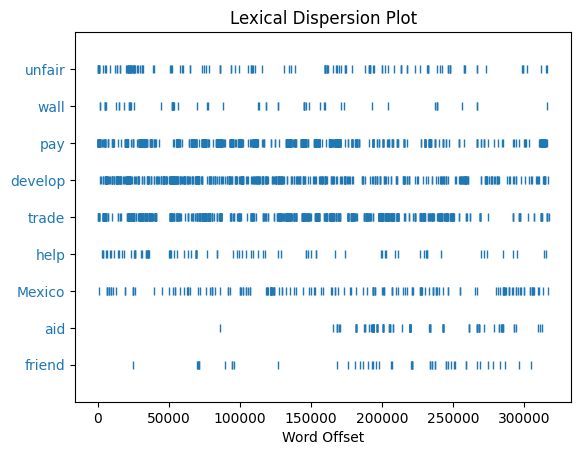

In [33]:
corpus_nltk_text.dispersion_plot(['friend', 'aid','Mexico','help','trade','develop','pay','wall','unfair'])

Below are the 30 tokens that appear most often

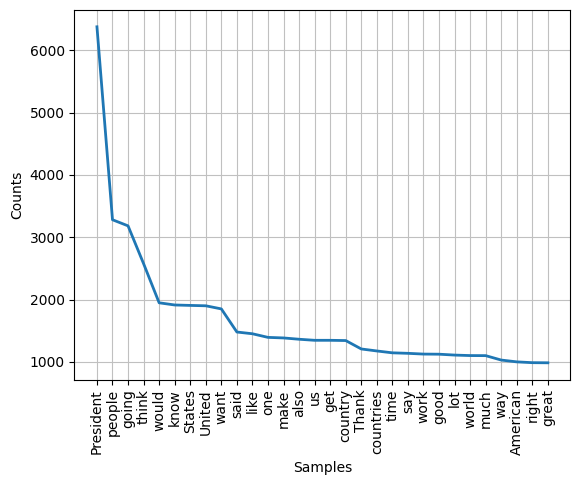

In [34]:
fdist = FreqDist(filtered_tokens)
fdist.plot(30, cumulative=False)
plt.show()

Next, I will tokenlze the corpus

In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load text
text = corpus_text

# Token
tokens = word_tokenize(text)

# Filter useing stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
filtered_tokens = [word for word in filtered_tokens if word != 'Q']

# Stemming
porter = PorterStemmer()
stemmed_tokens = [porter.stem(word) for word in filtered_tokens]

# Morphology reduction
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [36]:
# Define the function
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list])

    doc = nlp(word_list.lower())

    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In this section, I'll generate a dataframe to store more information. Note that since some of the text in my original csv is too large and stored in different columns, I need to merge them first. This step takes a long time. Notiice: Although I normalized the text, it is not created within the data frame, therefore I want to normalize it again

In [37]:
# Merge and tokenize the text
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")

df['normalized_tokens'] = df['Merged_Text'].apply(lambda x: normalizeTokens(x))
df['normalized_tokens_count'] = df['normalized_tokens'].apply(lambda x: len(x))

print(df.head())

        DATE                                              TITLE  \
0  16-Feb-01  The President's News Conference With President...   
1  29-Mar-01                    The President's News Conference   
2  22-Apr-01  The President's News Conference With Summit of...   
3  11-May-01                    The President's News Conference   
4  24-Aug-01        The President's News Conference in Crawford   

          SPEAKER                                           CITATION  \
0  George W. Bush  George W. Bush, The President's News Conferenc...   
1  George W. Bush  George W. Bush, The President's News Conferenc...   
2  George W. Bush  George W. Bush, The President's News Conferenc...   
3  George W. Bush  George W. Bush, The President's News Conferenc...   
4  George W. Bush  George W. Bush, The President's News Conferenc...   

                                                 URL  \
0  https://www.presidency.ucsb.edu/documents/the-...   
1  https://www.presidency.ucsb.edu/documents/the-...

Now, I will create a conditional frequency distribution based on the part-of-speech (POS) tags of words in the dataframe

In [38]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [39]:
# This takes about three minutes
df['normalized_tokens_POS'] = [spacy_pos(t) for t in df['Merged_Text']]

In [40]:
whcfdist_WordtoPOS = nltk.ConditionalFreqDist(df['normalized_tokens_POS'].sum())
list(whcfdist_WordtoPOS.items())[:10]

[('president', FreqDist({'NN': 3337, 'NNP': 3212, 'VB': 2, 'VBP': 1})),
 ('fox', FreqDist({'NNP': 148, 'NN': 7})),
 ('.', FreqDist({'.': 44601, 'NNP': 2560, 'NN': 3, 'LS': 2})),
 ('good', FreqDist({'JJ': 1245, 'NN': 28, 'NNP': 9, 'RB': 3, 'UH': 1})),
 ('afternoon', FreqDist({'NN': 115})),
 (',', FreqDist({',': 41603})),
 ('mr', FreqDist({'NNP': 1358})),
 ('this', FreqDist({'DT': 5232})),
 ('morning', FreqDist({'NN': 122, 'NNP': 1})),
 ('i', FreqDist({'PRP': 14443, 'NNP': 14, 'NN': 5}))]

In [41]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in df['normalized_tokens_POS'].sum())

Now we have a new column:

In [42]:
df.to_csv('President_with_token.csv', index=False) # Save for later use
df

,DATE,TITLE,SPEAKER,CITATION,URL,TEXT1,TEXT2,TEXT3,TEXT4,Merged_Text,normalized_tokens,normalized_tokens_count,normalized_tokens_POS
0,16-Feb-01,The President's News Conference With President...,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"President Fox. Good afternoon. Good afternoon,...",NaN,NaN,NaN,"President Fox. Good afternoon. Good afternoon,...","[president, fox, good, afternoon, good, aftern...",1604,"[(president, NNP), (fox, NNP), (., .), (good, ..."
1,29-Mar-01,The President's News Conference,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,The President. Good morning. I first want to s...,NaN,NaN,NaN,The President. Good morning. I first want to s...,"[president, good, morning, want, pleased, hous...",2177,"[(the, DT), (president, NN), (., .), (good, JJ..."
2,22-Apr-01,The President's News Conference With Summit of...,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,[Prime Minister Jean Chretien of Canada opened...,NaN,NaN,NaN,[Prime Minister Jean Chretien of Canada opened...,"[prime, minister, jean, chretien, canada, open...",2049,"[([, -LRB-), (prime, NNP), (minister, NNP), (j..."
3,11-May-01,The President's News Conference,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"The President. Good afternoon. First, let me b...",NaN,NaN,NaN,"The President. Good afternoon. First, let me b...","[president, good, afternoon, let, begin, talk,...",1965,"[(the, DT), (president, NN), (., .), (good, JJ..."
4,24-Aug-01,The President's News Conference in Crawford,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,Nominations for Chairman and Vice-Chairman of ...,this is—you've been reluctant to talk about t...,NaN,NaN,Nominations for Chairman and Vice-Chairman of ...,"[nomination, chairman, vice, chairman, joint, ...",2639,"[(nominations, NNS), (for, IN), (chairman, NN)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,7-Sep-20,The President's News Conference,Donald J. Trump,"Donald J. Trump, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,The President. Thank you very much. Thank you....,I know. I know.\nQ. We're 2 months out from th...,NaN,NaN,The President. Thank you very much. Thank you....,"[president, thank, thank, happy, labor, day, s...",3461,"[(the, DT), (president, NN), (., .), (thank, V..."
103,25-Mar-21,The President's News Conference,Joseph R. Biden,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,"The President. Please, please sit down. Thank ...","h God, I miss him. [Laughter]\nQ. Have you—hav...",NaN,NaN,"The President. Please, please sit down. Thank ...","[president, sit, thank, thank, good, afternoon...",3845,"[(the, DT), (president, NN), (., .), (please, ..."
104,19-Jan-22,The President's News Conference,Joseph R. Biden,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,"The President. Hello, folks. Thanks for being ...",ic thing that's happened to Mother Russia—in t...,to succeed—other than sending more body bags ...,"on drugs? What do you think?\nI mean, I just—I...","The President. Hello, folks. Thanks for being ...","[president, hello, folk, thank, good, afternoo...",6941,"[(the, DT), (president, NN), (., .), (hello, U..."
105,10-Jan-23,The President's News Conference With Prime Min...,Joseph R. Biden,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,Moderator. Good afternoon. Good afternoon. And...,"s.\nBut like I said, we're going to make sure ...",NaN,NaN,Moderator. Good afternoon. Good afternoon. And...,"[moderator, good, afternoon, good, afternoon, ...",3609,"[(mod

Find the 20 most commonly used verbs

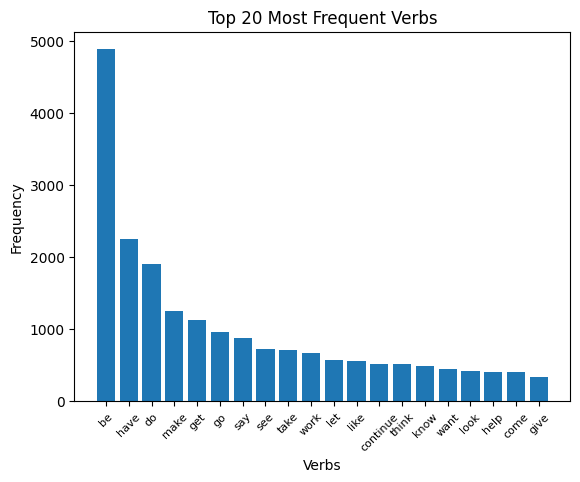

In [43]:
# Get the frequency distribution for verbs (VB)
verb_freq_dist = whcfdist_POStoWord['VB']

# Get the top 20 most common verbs
top_20_verb = verb_freq_dist.most_common(20)

# Convert the result to a dictionary for plotting
top_20_dict = dict(top_20_verb)

# Plot the frequency distribution
plt.bar(top_20_dict.keys(), top_20_dict.values())
plt.xlabel('Verbs')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Verbs')
plt.tick_params(axis='x', rotation=45, labelsize=8)
plt.show()


Generate a word cloud

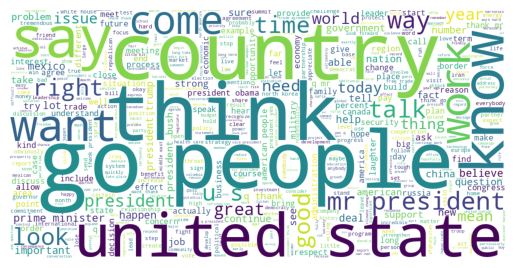

In [44]:
from wordcloud import WordCloud

# Generate WordCloud
presidentwc = WordCloud(
    background_color="white",
    max_words=500,
    width=2000,
    height=1000,
    mode='RGBA',
    scale=0.5
).generate(' '.join(df['normalized_tokens'].sum()))

# Display the WordCloud
plt.imshow(presidentwc)
plt.axis("off")
plt.savefig("president_word_cloud.pdf", format='pdf')
plt.show()

I want to know the verbs and adjectives around Mexico. I found that the president's speech relating to Mexico had to do with strengthening Mexico.

In [45]:
corpus_subset = df['normalized_tokens_POS']
# Flatten the list of tuples
flattened_tokens = [item for sublist in corpus_subset for item in sublist]

# Find the index of 'Mexico' in the flattened list
mexico_index = [i for i, (word, pos) in enumerate(flattened_tokens) if word.lower() == 'mexico']

# Extract words around 'Mexico' (considering a window size of 20 tokens)
window_size = 20
context_words = flattened_tokens[max(0, mexico_index[0] - window_size):min(len(flattened_tokens), mexico_index[0] + window_size + 1)]

# Filter verbs and adjectives
verbs = [word for word, pos in context_words if pos.startswith('V')]
adjectives = [word for word, pos in context_words if pos.startswith('JJ')]

# Print the lists
print("Verbs around 'Mexico':", verbs)
print("Adjectives around 'Mexico':", adjectives)

Verbs around 'Mexico': ['has', 'is', 'places', 'strengthening', 'is', 'starting', 'is']
Adjectives around 'Mexico': ['clear', 'same', 'encouraging']


We can see that the United States wants to strengthen Mexico and its relations with Mexico

Now, I will make my own four corpora. I will separate the original presidential news data according to the four presidents. In order to reduce the processing time, I will randomly select three news articles from each president and combine them.

In [46]:
import pandas as pd
import random

# Initialize fourpresidentdf with an empty DataFrame
fourpresidentdf = pd.DataFrame(columns=['SPEAKER', 'normalized_tokens'])

# Get unique SPEAKER values from df
unique_speakers = df['SPEAKER'].unique()

# Iterate through unique SPEAKER values
for speaker in unique_speakers:
    # Select all rows for the current SPEAKER
    speaker_data = df[df['SPEAKER'] == speaker]['normalized_tokens']

    # Randomly select 3 rows for the current SPEAKER
    if len(speaker_data) >= 3:
        selected_indices = random.sample(range(len(speaker_data)), 3)
        selected_tokens = speaker_data.iloc[selected_indices].tolist()
    else:
        selected_tokens = speaker_data.tolist()

    # Create a new DataFrame with SPEAKER and selected tokens
    speaker_df = pd.DataFrame({'SPEAKER': [speaker] * 3, 'normalized_tokens': selected_tokens})

    # Concatenate the new DataFrame to fourpresidentdf
    fourpresidentdf = pd.concat([fourpresidentdf, speaker_df])

# Reset the index of the resulting DataFrame
fourpresidentdf = fourpresidentdf.reset_index(drop=True)

# Group by 'SPEAKER' and concatenate 'normalized_tokens'
fourpresidentdf = df.groupby('SPEAKER')['normalized_tokens'].agg(lambda x: sum(x, [])).reset_index()

# Reset the index of the resulting DataFrame
fourpresidentdf = fourpresidentdf.reset_index(drop=True)

# Display the resulting DataFrame
fourpresidentdf

,SPEAKER,normalized_tokens
0,Barack Obama,"[president, obama, hello, good, afternoon, pri..."
1,Donald J. Trump,"[president, trump, thank, honor, prime, minist..."
2,George W. Bush,"[president, fox, good, afternoon, good, aftern..."
3,Joseph R. Biden,"[president, sit, thank, thank, good, afternoon..."


Define the functions

In [49]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

Next, I calculated the distances of KL and Wasserstein respectively and drew heat maps

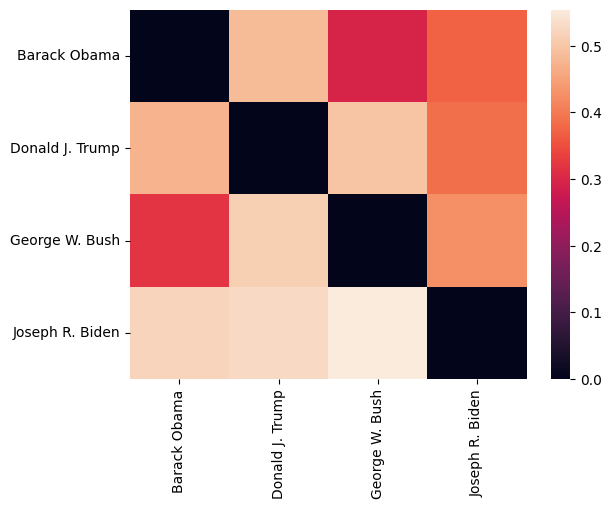

In [53]:
measure = 'KL' #"KL", "Chi2", "KS", "Wasserstein"
fileids_president = list(fourpresidentdf['SPEAKER'])
corpora_president = list(fourpresidentdf['normalized_tokens'])
L = []
for p in corpora_president:
    l = []
    for q in corpora_president:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_president, index = fileids_president)
ax = sns.heatmap(div)
plt.show()

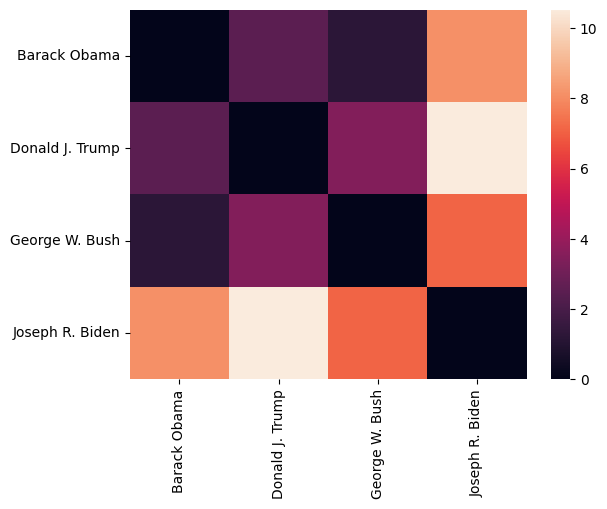

In [54]:
measure = 'Wasserstein' #"KL", "Chi2", "KS", "Wasserstein"
fileids_president = list(fourpresidentdf['SPEAKER'])
corpora_president = list(fourpresidentdf['normalized_tokens'])
L = []
for p in corpora_president:
    l = []
    for q in corpora_president:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_president, index = fileids_president)
ax = sns.heatmap(div)
plt.show()

Above shows the two difference methods I will further discuss and compare in the essay part

## 3. Topic Modeling and Clustering

First I will Create resulting matrix

In [56]:
import sklearn.feature_extraction.text

# First, initialize the CountVectorizer
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()

# Then, train the CountVectorizer on your data
PresidentDataVects = ngCountVectorizer.fit_transform(df['Merged_Text'])

# Print the shape of the resulting matrix
print(PresidentDataVects.shape)


(107, 15086)


TF-IDF vectorization

In [57]:
PresidentDataVects

<107x15086 sparse matrix of type '<class 'numpy.int64'>'
	with 132976 stored elements in Compressed Sparse Row format>

In [58]:
PresidentDataVects[:10,:20].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 4, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 9, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [59]:
import sklearn.feature_extraction.text as text

#initialize
PresidentTFTransformer = text.TfidfTransformer().fit(PresidentDataVects)
#train
PresidentTF = PresidentTFTransformer.transform(PresidentDataVects)
print(PresidentTF.shape)

(107, 15086)


Glossary items and their corresponding TF-IDF values:

In [60]:
list(zip(ngCountVectorizer.vocabulary_.keys(), PresidentTF.data))[:20]

[('president', 0.024056440015130763),
 ('fox', 0.04566559754333257),
 ('good', 0.029299283425047087),
 ('afternoon', 0.11231391979601384),
 ('mr', 0.00556118196209278),
 ('this', 0.002605220768178438),
 ('morning', 0.0025103891611355372),
 ('have', 0.021974462568785314),
 ('held', 0.012321598693413037),
 ('very', 0.01013501599705692),
 ('productive', 0.0035711517594748617),
 ('and', 0.012321598693413037),
 ('cordial', 0.0044729839559212335),
 ('talks', 0.0037966911000941305),
 ('with', 0.05615695989800692),
 ('the', 0.008945967911842467),
 ('of', 0.0034657422845120623),
 ('united', 0.07813142246679224),
 ('states', 0.013147577825825508),
 ('george', 0.00976642780834903)]

Converts text to a TF-IDF vector representation

In [61]:
import sklearn.feature_extraction.text as text

# Dfine the TfidfVectorizer with specified parameters
TFVectorizer = text.TfidfVectorizer(
    max_df=0.5,          # Ignore terms that appear in more than 50% of the documents
    max_features=1000,   # Limit the number of features (terms) to 1000
    min_df=3,            # Ignore terms that appear in fewer than 3 documents
    stop_words='english', # Remove English stop words
    norm='l2'            # Apply L2 normalization to the TF-IDF matrix
)

# Train the TfidfVectorizer on your data and transform the documents into TF-IDF vectors
PresidentTFVects = TFVectorizer.fit_transform(df['Merged_Text'])

Now we apply K-means method:

In [62]:
numCategories = 5

In [65]:
km = sklearn.cluster.KMeans(n_clusters=5, init='k-means++')
km.fit(PresidentTFVects)

KMeans(n_clusters=5)

In [66]:
# Perform PCA for dimensionality reduction
pca = sklearn.decomposition.PCA(n_components=2).fit(PresidentTFVects.toarray())
reduced_data = pca.transform(PresidentTFVects.toarray())

# Apply KMeans clustering
km = sklearn.cluster.KMeans(n_clusters=numCategories, init='k-means++')
labels = km.fit_predict(PresidentTFVects)

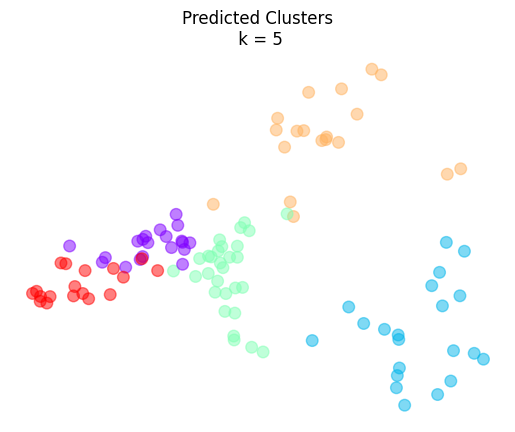

In [67]:
# Visualize the clustering results
colors = list(plt.cm.rainbow(np.linspace(0, 1, numCategories)))
colors_p = [colors[l] for l in labels]

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color=colors_p, alpha=0.5, s=70)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(numCategories))
plt.show()

At this stage I choose 5 because I learned from below chunk code results and then I came back and modified my code with 5 clusters

Now I wil calculate silhouette score for eache number of clusters

In [68]:
import sklearn
import sklearn.cluster
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np

def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=70, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

<ipython-input-68-80de7e0dc306>:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=70, lw=0, alpha=0.7,


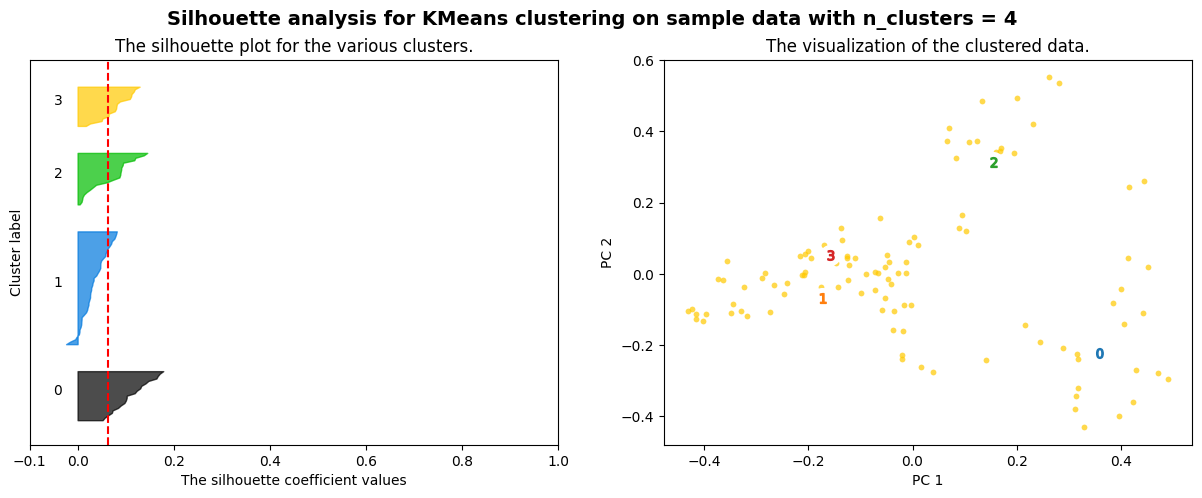

For n_clusters = 4, The average silhouette_score is : 0.063


In [69]:
X = PresidentTFVects.toarray()
plotSilhouette(4, X)

<ipython-input-68-80de7e0dc306>:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=70, lw=0, alpha=0.7,


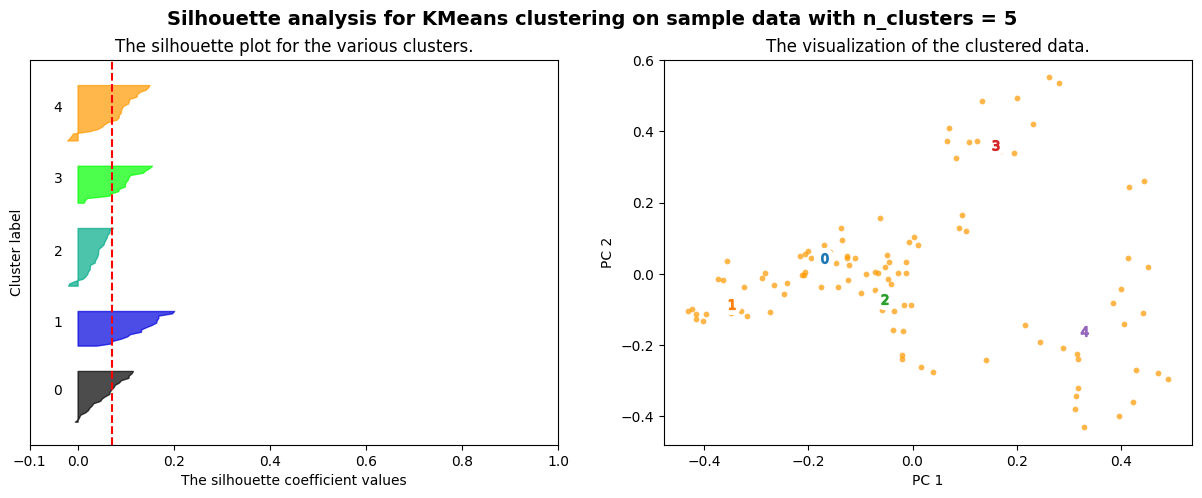

For n_clusters = 5, The average silhouette_score is : 0.073


In [70]:
X = PresidentTFVects.toarray()
plotSilhouette(5, X)

<ipython-input-68-80de7e0dc306>:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=70, lw=0, alpha=0.7,


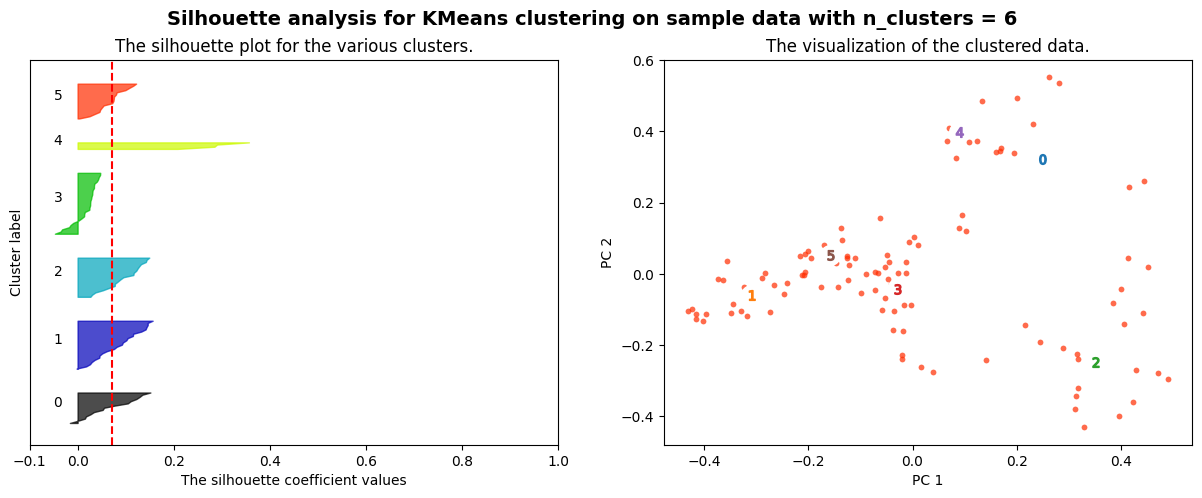

For n_clusters = 6, The average silhouette_score is : 0.071


In [71]:
X = PresidentTFVects.toarray()
plotSilhouette(6, X)

Because kmeans relies on the ramdon seed, I will run 10 times and see the best outcome

In [77]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold

# Set the number of repetitions
num_repeats = 10
best_score = float("-inf")

for _ in range(num_repeats):
    # Randomly split the dataset into K folds
    kf = KFold(n_splits=5, shuffle=True)

    # Perform KMeans clustering for each fold
    for train_index, _ in kf.split(PresidentTFVects):
        km = KMeans(n_clusters=numCategories, init='k-means++')
        labels = km.fit_predict(PresidentTFVects)

        # Calculate silhouette score
        score = silhouette_score(PresidentTFVects, labels)

        # Update the best score if the current result is better
        if score > best_score:
            best_score = score

# Print the best silhouette score
print("Best silhouette score:", best_score)


Best silhouette score: 0.07502981108543552


Therefore, I find the 5 is the best number od cluster, I will post top words for each cluster:

In [73]:
terms = TFVectorizer.get_feature_names_out()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(5):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 trump
 poland
 korea
 tariffs
 japan
 tremendous
 iran
 syria
 baltic
 european


Cluster 1:
 bush
 fox
 iraq
 canada
 peru
 terrorism
 mexican
 terror
 el
 initiative


Cluster 2:
 tax
 iraq
 nuclear
 budget
 al
 oil
 qaida
 europe
 iran
 weapons


Cluster 3:
 canada
 obama
 calderon
 harper
 colombia
 mexican
 trudeau
 peña
 nieto
 canadian


Cluster 4:
 testing
 virus
 coronavirus
 numbers
 biden
 governors
 vaccine
 ballots
 tremendous
 schools




Extract each cluster keyword and tag it in the plot

In [74]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

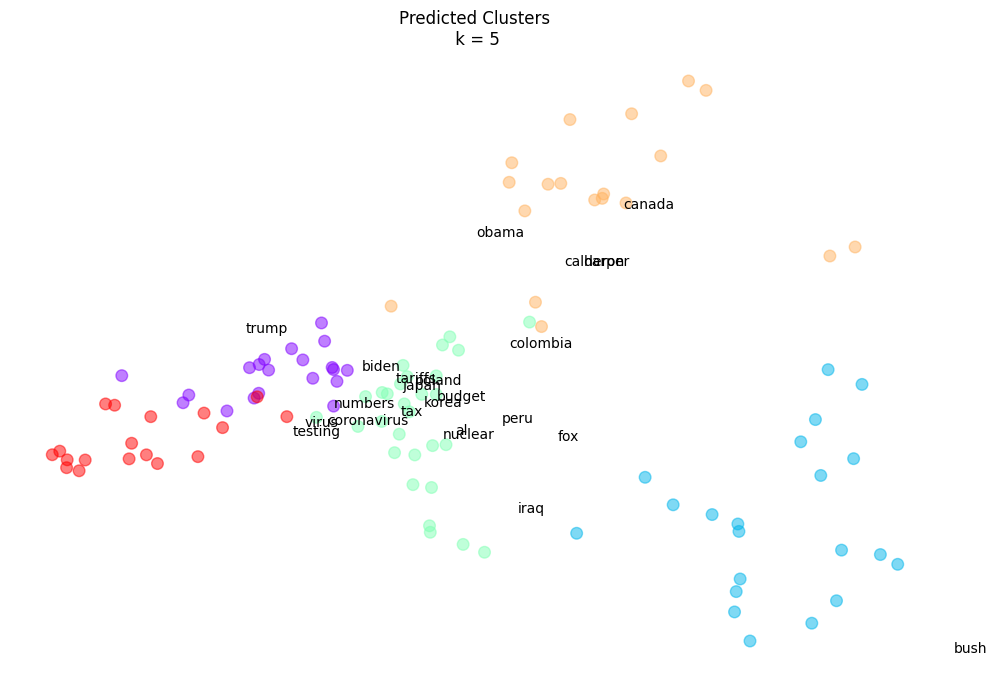

In [75]:
import matplotlib.pyplot as plt
import numpy as np

colors = list(plt.cm.rainbow(np.linspace(0, 1, numCategories)))
colors_p = [colors[l] for l in labels]

# Increase figure size for better visibility
fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color=colors_p, alpha=0.5, s=70)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(numCategories))

# Code for adding text labels
components = pca.components_
keyword_ids = list(set(order_centroids[:,:5].flatten()))
words = [terms[i] for i in keyword_ids]
x = components[:, keyword_ids][0, :]
y = components[:, keyword_ids][1, :]

for i, word in enumerate(words):
    plt.text(x[i], y[i], word, fontsize=10, ha='left', va='bottom')

plt.show()

For topic modeling, I will Filter words

In [78]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

df['reduced_tokens'] = df['normalized_tokens'].apply(lambda x: dropMissing(x, TFVectorizer.vocabulary_.keys()))

Create dictionary

In [79]:
dictionary = gensim.corpora.Dictionary(df['reduced_tokens'])

Then for each of the texts we create a list of tuples containing each token and its count.

In [80]:
corpus = [dictionary.doc2bow(text) for text in df['reduced_tokens']]

The Gensim library is used to serialize and load the corpus

In [81]:
gensim.corpora.MmCorpus.serialize('senate.mm', corpus)
senmm = gensim.corpora.MmCorpus('senate.mm')

Topic modeling

In [82]:
senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

We can see the portion of each topic in a specific text

In [83]:
sen1Bow = dictionary.doc2bow(df['reduced_tokens'][0])
sen1lda = senlda[sen1Bow]
print("The topics of the text: {}".format(df['TITLE'][0]))
print("are: {}".format(sen1lda))

The topics of the text: The President's News Conference With President Vicente Fox of Mexico in San Cristobal, Mexico
are: [(3, 0.12664665), (5, 0.57533056), (7, 0.2868935)]


Now we can create a new dataframe and visualize the porpotion of each topic in each text

In [84]:
ldaDF = pandas.DataFrame({
        'TITLE' : df['TITLE'],
        'topics' : [senlda[dictionary.doc2bow(l)] for l in df['reduced_tokens']]
    })

In [87]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(senlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::10]

,TITLE,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,The President's News Conference,"[(0, 0.099557824), (2, 0.08277238), (3, 0.0543...",0.099558,0.000000,0.082772,0.054317,0.000000,0.000000,0.000000,0.267429,0.285022,0.205223
11,The President's News Conference With President...,"[(3, 0.92369217), (7, 0.07200101)]",0.000000,0.000000,0.000000,0.923692,0.000000,0.000000,0.000000,0.072001,0.000000,0.000000
21,The President's News Conference With Prime Min...,"[(3, 0.1029616), (5, 0.30596578), (7, 0.509435...",0.000000,0.000000,0.000000,0.102962,0.000000,0.305966,0.000000,0.509436,0.079340,0.000000
31,The President's News Conference,"[(2, 0.6177812), (5, 0.052766275), (6, 0.05426...",0.000000,0.000000,0.617781,0.000000,0.000000,0.052766,0.054262,0.100120,0.167621,0.000000
41,The President's News Conference,"[(2, 0.09525068), (5, 0.14702754), (6, 0.06968...",0.000000,0.000000,0.095251,0.000000,0.000000,0.147028,0.069685,0.000000,0.011214,0.673965
51,The President's News Conference With President...,"[(0, 0.1483078), (1, 0.16176452), (7, 0.688161)]",0.148308,0.161765,0.000000,0.000000,0.000000,0.000000,0.000000,0.688161,0.000000,0.000000
61,The President's News Conference With Prime Min...,"[(1, 0.841084), (7, 0.14774105)]",0.000000,0.841084,0.000000,0.000000,0.000000,0.000000,0.000000,0.147741,0.000000,0.000000
71,The President's News Conference With Senate Ma...,"[(3, 0.012361372), (4, 0.6993059), (6, 0.22539...",0.000000,0.000000,0.000000,0.012361,0.699306,0.000000,0.225393,0.000000,0.015378,0.036421
81,The President's News Conference With Prime Min...,"[(0, 0.028231498), (1, 0.13637002), (6, 0.7151...",0.028231,0.136370,0.000000,0.000000,0.000000,0.000000,0.715129,0.000000,0.068627,0.042327
91,The President's News Conference,"[(3, 0.14376765), (4, 0.18548682), (5, 0.32300...",0.000000,0.000000,0.000000,0.143768,0.185487,0.323009,0.340555,0.000000,0.000000,0.000000


Now we cut the values and create a plot based on these values

In [88]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['TITLE']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.000000,0.0,0.000000,0.102990,0.0,0.564921,0.000000,0.319376,0.000000,0.000000
1,0.099558,0.0,0.082772,0.054317,0.0,0.000000,0.000000,0.267429,0.285022,0.205223
2,0.096767,0.0,0.000000,0.143723,0.0,0.666669,0.000000,0.088363,0.000000,0.000000
3,0.094960,0.0,0.000000,0.000000,0.0,0.000000,0.901509,0.000000,0.000000,0.000000
4,0.000000,0.0,0.224035,0.480272,0.0,0.000000,0.015688,0.237000,0.012885,0.020547
5,0.000000,0.0,0.620418,0.000000,0.0,0.000000,0.000000,0.377501,0.000000,0.000000
6,0.000000,0.0,0.283344,0.057576,0.0,0.305004,0.000000,0.000000,0.000000,0.350685
7,0.000000,0.0,0.016826,0.000000,0.0,0.089875,0.000000,0.000000,0.251720,0.637466
8,0.000000,0.0,0.223666,0.019772,0.0,0.000000,0.012867,0.186121,0.537100,0.019377
9,0.000000,0.0,0.000000,0.138917,0.0,0.657623,0.000000,0.199694,0.000000,0.000000


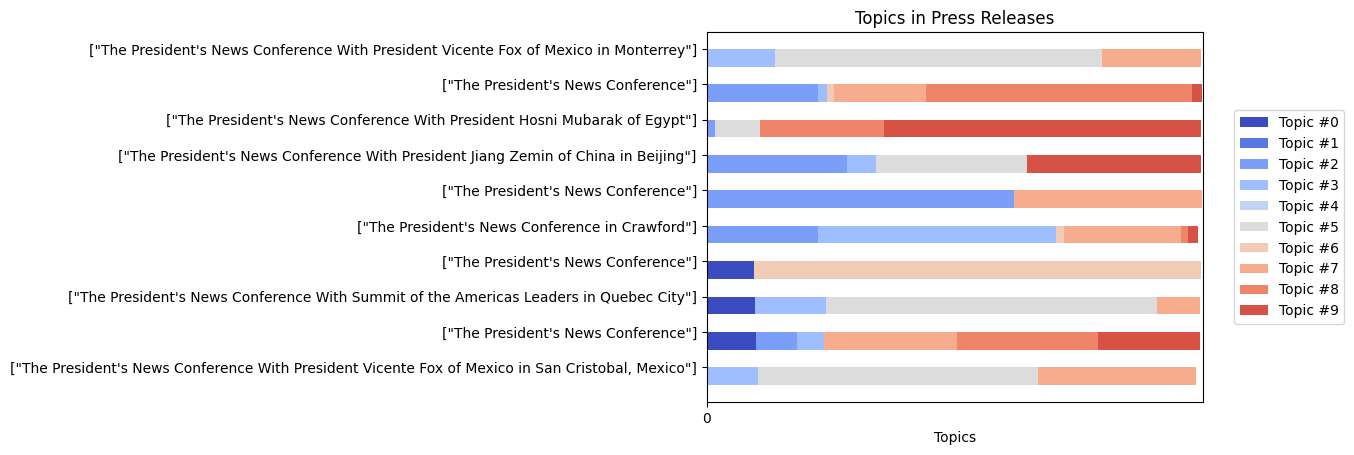

In [92]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
ind = np.arange(N)
K = senlda.num_topics  # N documents, K topics
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.barh(ind, ldaDFVis[:, k], height=width, color=color)
    else:
        p = plt.barh(ind, ldaDFVis[:, k], height=width, left=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)

plt.xlim((0, 1))  # proportions sum to 1, so the width of the stacked bars is 1
plt.xlabel('Topics')

plt.title('Topics in Press Releases')
plt.yticks(ind+width/2, ldaDFVisNames, rotation='horizontal')  # use yticks for horizontal orientation

plt.xticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center right', frameon=True, bbox_to_anchor=(1.3, 0.5))

plt.show()

From this plot we can see that, topic 2 topic 4and topic5 is most frequent appeared in the first 10 text, I would like to use another way to show the plot

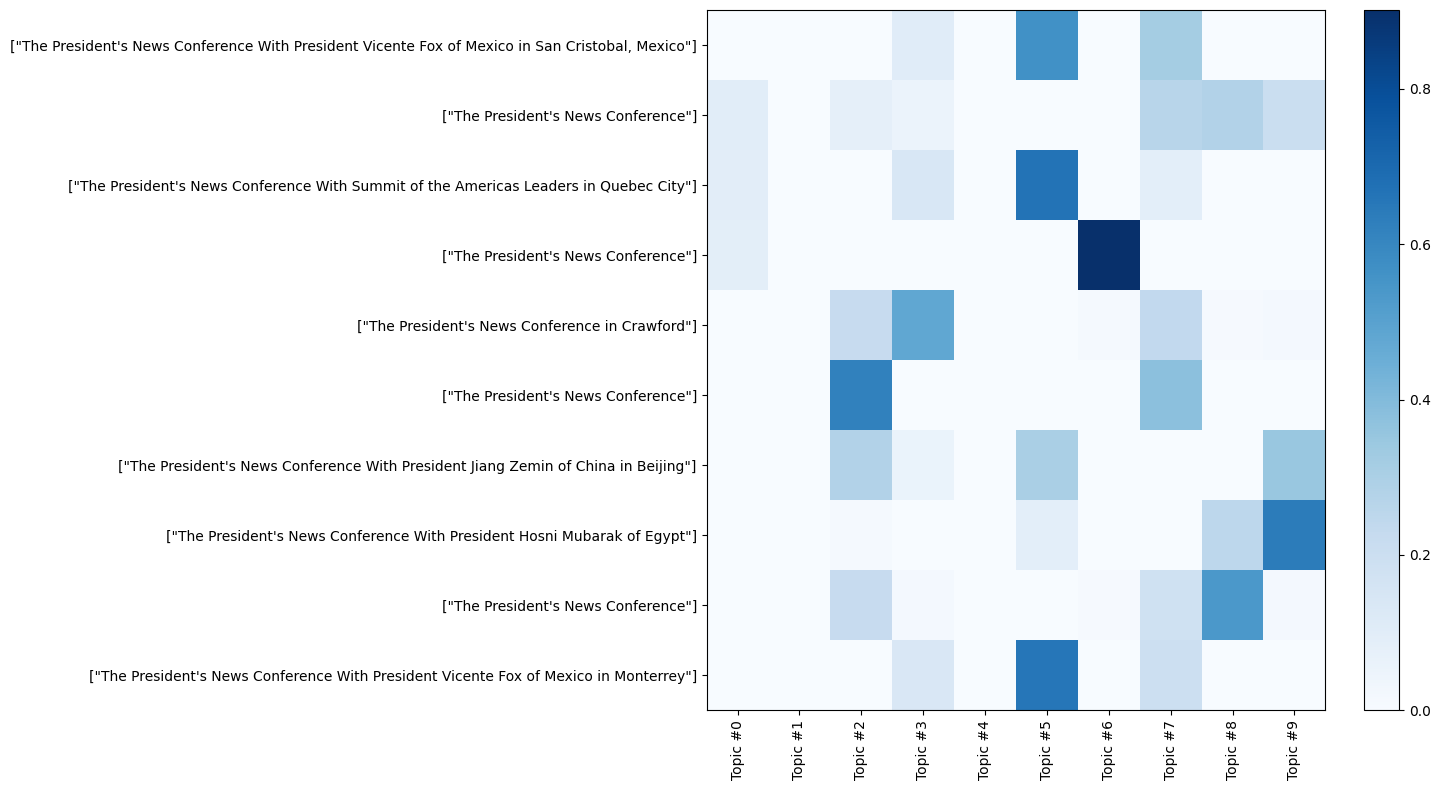

In [93]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Use plt.pcolormesh instead of plt.pcolor
mesh = ax.pcolormesh(ldaDFVis, norm=None, cmap='Blues')

# Set y-axis ticks and labels
ax.set_yticks(np.arange(ldaDFVis.shape[0])+0.5)
ax.set_yticklabels(ldaDFVisNames)

# Set x-axis ticks and labels
ax.set_xticks(np.arange(ldaDFVis.shape[1])+0.5)
ax.set_xticklabels(topic_labels)

# Invert the y-axis
ax.invert_yaxis()

# Rotate x-axis ticks
plt.xticks(rotation=90)

# Add colorbar
plt.colorbar(mesh, cmap='Blues')

# Adjust layout to fix margins
plt.tight_layout()

# Show the plot
plt.show()


This is the heat map of the values, again we can see topic2 topic4 topic5 has more different value

Next, I will find the top key words for each topic

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Text vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['reduced_tokens'].apply(lambda tokens: ' '.join(tokens)))

# K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Get cluster labels for each document
cluster_labels = kmeans.labels_

# Using LDA to generate 10 topics
lda = LatentDirichletAllocation(n_components=10)
topic_distribution = lda.fit_transform(X)

# Add cluster labels and topics as additional features
df['cluster'] = cluster_labels
df['topic_feature'] = topic_distribution.argmax(axis=1)

In [96]:
# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top 10 words for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: sweden, costa, rica, asad, baltic, dr, voting, strengthening, following, precisely
Topic 1: virus, testing, coronavirus, vaccine, test, school, governor, arizona, voting, nursing
Topic 2: technologies, cities, arizona, baltic, developing, asad, covid, italian, poland, leading
Topic 3: technologies, cities, arizona, baltic, developing, asad, covid, italian, poland, leading
Topic 4: baltic, finland, kavanaugh, arizona, affected, sweden, voting, dr, joe, black
Topic 5: technologies, cities, arizona, baltic, developing, asad, covid, italian, poland, leading
Topic 6: technologies, cities, arizona, baltic, developing, asad, covid, italian, poland, leading
Topic 7: bush, trump, canada, obama, iraq, mexican, iran, drug, nuclear, tax
Topic 8: poland, peña, nieto, asad, duda, fda, baltic, chemical, italian, kavanaugh
Topic 9: italy, isil, italian, asad, mail, ended, sweden, leading, voting, related


## 4. Word Embeddings

In this part I will call my previous data

In [98]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Content_Analysis/Homework-Notebooks/week 4')

President = pd.read_csv('President_with_token.csv')
President = President[['DATE', 'URL', 'Merged_Text']]
President

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,DATE,URL,Merged_Text
0,16-Feb-01,https://www.presidency.ucsb.edu/documents/the-...,"President Fox. Good afternoon. Good afternoon,..."
1,29-Mar-01,https://www.presidency.ucsb.edu/documents/the-...,The President. Good morning. I first want to s...
2,22-Apr-01,https://www.presidency.ucsb.edu/documents/the-...,[Prime Minister Jean Chretien of Canada opened...
3,11-May-01,https://www.presidency.ucsb.edu/documents/the-...,"The President. Good afternoon. First, let me b..."
4,24-Aug-01,https://www.presidency.ucsb.edu/documents/the-...,Nominations for Chairman and Vice-Chairman of ...
...,...,...,...
102,7-Sep-20,https://www.presidency.ucsb.edu/documents/the-...,The President. Thank you very much. Thank you....
103,25-Mar-21,https://www.presidency.ucsb.edu/documents/the-...,"The President. Please, please sit down. Thank ..."
104,19-Jan-22,https://www.presidency.ucsb.edu/documents/the-...,"The President. Hello, folks. Thanks for being ..."
105,10-Jan-23,https://www.presidency.ucsb.edu/documents/the-...,Moderator. Good afternoon. Good afternoon. And...


In [112]:
keywords = ['mexico', 'president', 'aid', 'help','unfair','wall','develop','trade']

In [100]:
President['tokenized_words'] = President['Merged_Text'].apply(lambda x: lucem_illud.word_tokenize(x))
President['normalized_words'] = President['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))
President

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


,DATE,URL,Merged_Text,tokenized_words,normalized_words
0,16-Feb-01,https://www.presidency.ucsb.edu/documents/the-...,"President Fox. Good afternoon. Good afternoon,...","[President, Fox, Good, afternoon, Good, aftern...","[president, fox, good, afternoon, good, aftern..."
1,29-Mar-01,https://www.presidency.ucsb.edu/documents/the-...,The President. Good morning. I first want to s...,"[The, President, Good, morning, I, first, want...","[president, good, morning, want, pleased, hous..."
2,22-Apr-01,https://www.presidency.ucsb.edu/documents/the-...,[Prime Minister Jean Chretien of Canada opened...,"[Prime, Minister, Jean, Chretien, of, Canada, ...","[prime, minister, jean, chretien, canada, open..."
3,11-May-01,https://www.presidency.ucsb.edu/documents/the-...,"The President. Good afternoon. First, let me b...","[The, President, Good, afternoon, First, let, ...","[president, good, afternoon, let, begin, talki..."
4,24-Aug-01,https://www.presidency.ucsb.edu/documents/the-...,Nominations for Chairman and Vice-Chairman of ...,"[Nominations, for, Chairman, and, Vice, Chairm...","[nominations, chairman, vice, chairman, joint,..."
...,...,...,...,...,...
102,7-Sep-20,https://www.presidency.ucsb.edu/documents/the-...,The President. Thank you very much. Thank you....,"[The, President, Thank, you, very, much, Thank...","[president, thank, thank, happy, labor, day, s..."
103,25-Mar-21,https://www.presidency.ucsb.edu/documents/the-...,"The President. Please, please sit down. Thank ...","[The, President, Please, please, sit, down, Th...","[president, sit, thank, thank, good, afternoon..."
104,19-Jan-22,https://www.presidency.ucsb.edu/documents/the-...,"The President. Hello, folks. Thanks for being ...","[The, President, Hello, folks, Thanks, for, be...","[president, hello, folks, thanks, good, aftern..."
105,10-Jan-23,https://www.presidency.ucsb.edu/documents/the-...,Moderator. Good afternoon. Good afternoon. And...,"[Moderator, Good, afternoon, Good, afternoon, ...","[moderator, good, afternoon, good, afternoon, ..."


I need to pick some tags

In [101]:
from gensim.models.doc2vec import TaggedDocument

taggedDocs = []
for index, row in President.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['DATE'])
    docKeywords.append(row['URL']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = row['normalized_words'], tags = docKeywords))
President['TaggedAbstracts'] = taggedDocs

Now we train the Doc2Vec model:

In [102]:
PresidentD2V = gensim.models.doc2vec.Doc2Vec(President['TaggedAbstracts'], vector_size = 100) #Limiting to 100 dimensions

In [113]:
targetDocs = President['DATE'][:10]

heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = PresidentD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, PresidentD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

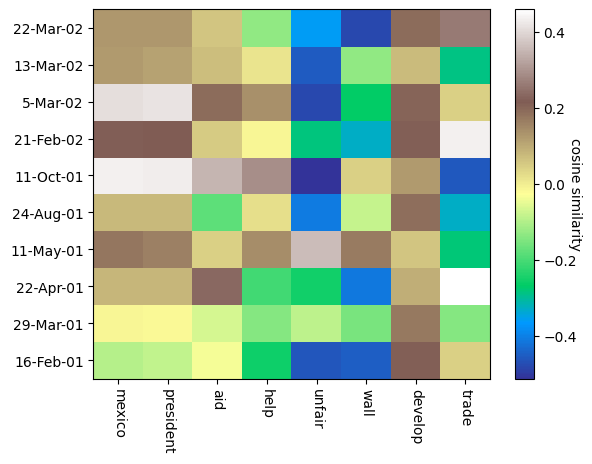

In [114]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

This plot shows taht, a large portion od speech talked about help and aid and develop

We will save the model in case we would like to use it again

In [115]:
PresidentD2V.save('PresidentD2V')

## 5. Classifying Meanings With Machine Learning

This part is the main part, I will test different methods to help me predict sentiments and apply it to run the regression in part 6

In [125]:
%cd /content/drive/MyDrive/Content_Analysis/

/content/drive/MyDrive/Content_Analysis


I have coded with 3 different classmates now I load my csv

In [134]:
import pandas as pd
President = pd.read_csv('mexico_sentences.csv')
President['Final_Label'] = President[['A1', 'A2', 'A3']].mode(axis=1)[0]
President

,SPEAKER,DATE,TITLE,CITATION,URL,Merged_Text,A1,A2,A3,Final_Label
0,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,The fact that the President—George Bush's firs...,2.0,2.0,2.0,2.0
1,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,I also acknowledge President Bush's demonstra...,2.0,2.0,2.0,2.0
2,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"President, that you will always be welcome in...",2.0,2.0,2.0,2.0
3,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"We, the Presidents of Mexico and the United St...",2.0,1.0,1.0,1.0
4,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"Muchas gracias, amigo, el Presidente de Mexico",2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
901,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,That's exactly what we're doing in Mexico,NaN,NaN,NaN,NaN
902,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,This doesn't happen in Mexico anymore,NaN,NaN,NaN,NaN
903,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,Just as I was telling you that in the case of...,NaN,NaN,NaN,NaN
904,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,"In the case of Mexico, this led us to make al...",NaN,NaN,NaN,NaN


Now, we transfer my dataframe to annotation, drop na values, because I coded 1/10 sentences and for those 10% data I have 3 coders for each, therefore, there are no na valuse withnin those labeled sentences

In [133]:
def random(numPerCategory = 500):
    datDict = {
        'vect' : [np.random.rand(2) * 2 - 1 for i in range(2 * numPerCategory)],
        'category' : [i % 2 for i in range(2 * numPerCategory)],
    }

    return pandas.DataFrame(datDict)

def andSplit(noise = 0, numPerCategory = 500):
    def genPoint(cat):
        y = np.random.random_sample() * 2 - 1
        if noise >= 0:
            x = np.random.random_sample() - cat - (np.random.random_sample() - cat) * noise
        else:
            x = (1 - noise * np.random.random_sample()) - cat
        return np.array([x, y])
    datDict = {
        'vect' : [genPoint(i % 2) for i in range(2 * numPerCategory)],
        'category' : [i % 2 for i in range(2 * numPerCategory)],
    }

    return pandas.DataFrame(datDict)

def xorSplit(noise = 0, numPerCategory = 500):
    def genPoint(cat):
        if cat == 1:
            if np.random.randint(0,2) < 1:
                y = np.random.random_sample() - np.random.random_sample() * noise * 2
                x = np.random.random_sample() - np.random.random_sample() * noise * 2
            else:
                y = np.random.random_sample() - 1 - np.random.random_sample() * noise * 2
                x = np.random.random_sample() - 1 - np.random.random_sample() * noise * 2
        else:
            if np.random.randint(0,2) < 1:
                y = np.random.random_sample() - 1 - np.random.random_sample() * noise * 2
                x = np.random.random_sample() - np.random.random_sample() * noise * 2
            else:
                y = np.random.random_sample() - np.random.random_sample() * noise * 2
                x = np.random.random_sample() - 1 - np.random.random_sample() * noise * 2
        return np.array([x, y])

    datDict = {
        'vect' : [genPoint(i % 2) for i in range(2 * numPerCategory)],
        'category' : [i % 2 for i in range(2 * numPerCategory)],
    }

    return pandas.DataFrame(datDict)

def targetSplit(noise = 0, numPerCategory = 500, innerRad = .3):
    def genPoint(cat):
        if cat == 0:
            r = np.random.random_sample() * innerRad + (1 - innerRad) * np.random.random_sample() * noise
        else:
            r = np.random.random_sample() * (1 - innerRad) + innerRad - innerRad * np.random.random_sample() * noise
        eta = 2 * np.pi * np.random.random_sample()
        return np.array([r * np.cos(eta), r * np.sin(eta)])

    datDict = {
        'vect' : [genPoint(i % 2) for i in range(2 * numPerCategory)],
        'category' : [i % 2 for i in range(2 * numPerCategory)],
    }

    return pandas.DataFrame(datDict)

def multiBlobs(noise = 0, numPerCategory = 500, centers = 5):
    if isinstance(centers, int):
        n_samples = numPerCategory * centers
    else:
        n_samples = numPerCategory * len(centers)
    X, y = sklearn.datasets.make_blobs(n_samples=n_samples, centers=centers, cluster_std = (.8 * (noise * 2 + 1)))
    datDict = {
        'vect' : list(X),
        'category' : y,
    }
    return pandas.DataFrame(datDict)

Now I spill data into labeled and predict data set

In [135]:
Predic_President = President[President['Final_Label'].isnull()]
Labeled_President = President.dropna(subset=['Final_Label'])

Predic_President.head()

,SPEAKER,DATE,TITLE,CITATION,URL,Merged_Text,A1,A2,A3,Final_Label
50,George W. Bush,24-Aug-01,The President's News Conference in Crawford,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,The history of the relationship between Mexico...,NaN,NaN,NaN,NaN
51,George W. Bush,24-Aug-01,The President's News Conference in Crawford,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"The long-term solution, however, for immigrati...",NaN,NaN,NaN,NaN
52,George W. Bush,24-Aug-01,The President's News Conference in Crawford,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,There are people in Mexico who have got child...,NaN,NaN,NaN,NaN
53,George W. Bush,11-Oct-01,The President's News Conference,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"Our staunch friends, Great Britain, our neigh...",NaN,NaN,NaN,NaN
54,George W. Bush,21-Feb-02,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,I have accepted with pleasure and appreciatio...,NaN,NaN,NaN,NaN


In [136]:
Labeled_President.head()

,SPEAKER,DATE,TITLE,CITATION,URL,Merged_Text,A1,A2,A3,Final_Label
0,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,The fact that the President—George Bush's firs...,2.0,2.0,2.0,2.0
1,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,I also acknowledge President Bush's demonstra...,2.0,2.0,2.0,2.0
2,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"President, that you will always be welcome in...",2.0,2.0,2.0,2.0
3,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"We, the Presidents of Mexico and the United St...",2.0,1.0,1.0,1.0
4,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"Muchas gracias, amigo, el Presidente de Mexico",2.0,2.0,2.0,2.0


Now I spill the train and test set

In [137]:
holdBackFraction = .2
train_data_df, test_data_df = sklearn.model_selection.train_test_split(Labeled_President, test_size=holdBackFraction)
print(len(train_data_df))
print(len(test_data_df))

130
33


Now I transfer the text into TF-IDF

In [138]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['Merged_Text'])
TFVects.shape

(130, 187)

In [139]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))
train_data_df['pca'] = [r for r in reduced_data]

Now I modify the code to show my three different attitude labels

<ipython-input-140-ffb7d7ace095>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(a[:, 0], a[:, 1], c=pallet[0], label="Negative attitude")
<ipython-input-140-ffb7d7ace095>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(a[:, 0], a[:, 1], c=pallet[1], label="Neutral attitude")
<ipython-input-140-ffb7d7ace095>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should

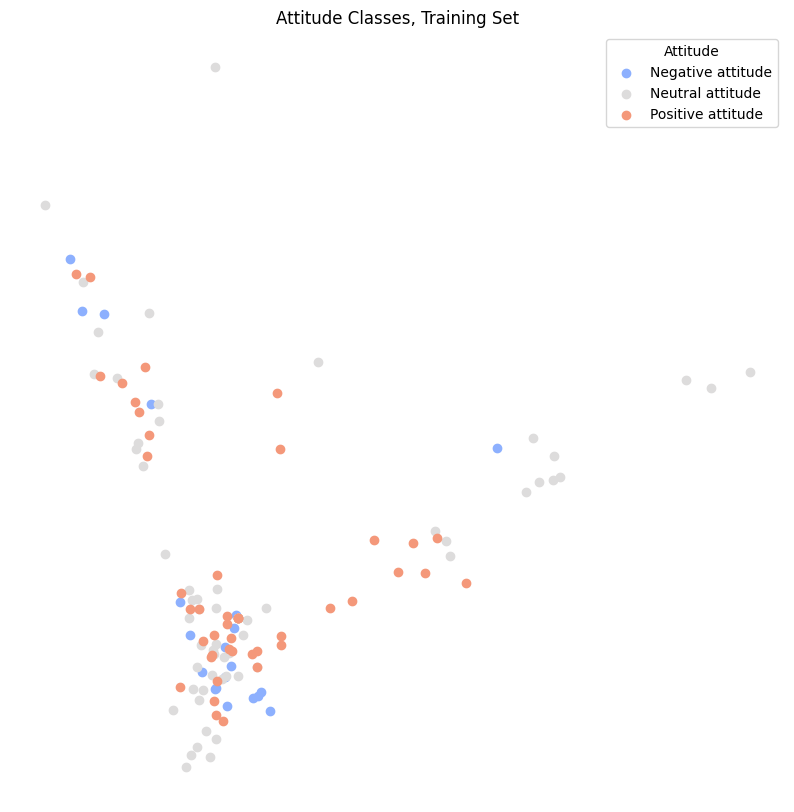

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors=3)

#  Negative attitude
a = np.stack(train_data_df[train_data_df['Final_Label'] == 0]['pca'])
ax.scatter(a[:, 0], a[:, 1], c=pallet[0], label="Negative attitude")

#  Neutral attitude
a = np.stack(train_data_df[train_data_df['Final_Label'] == 1]['pca'])
ax.scatter(a[:, 0], a[:, 1], c=pallet[1], label="Neutral attitude")

#  Positive attitude
a = np.stack(train_data_df[train_data_df['Final_Label'] == 2]['pca'])
ax.scatter(a[:, 0], a[:, 1], c=pallet[2], label="Positive attitude")

ax.legend(loc='upper right', title='Attitude')
plt.title('Attitude Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

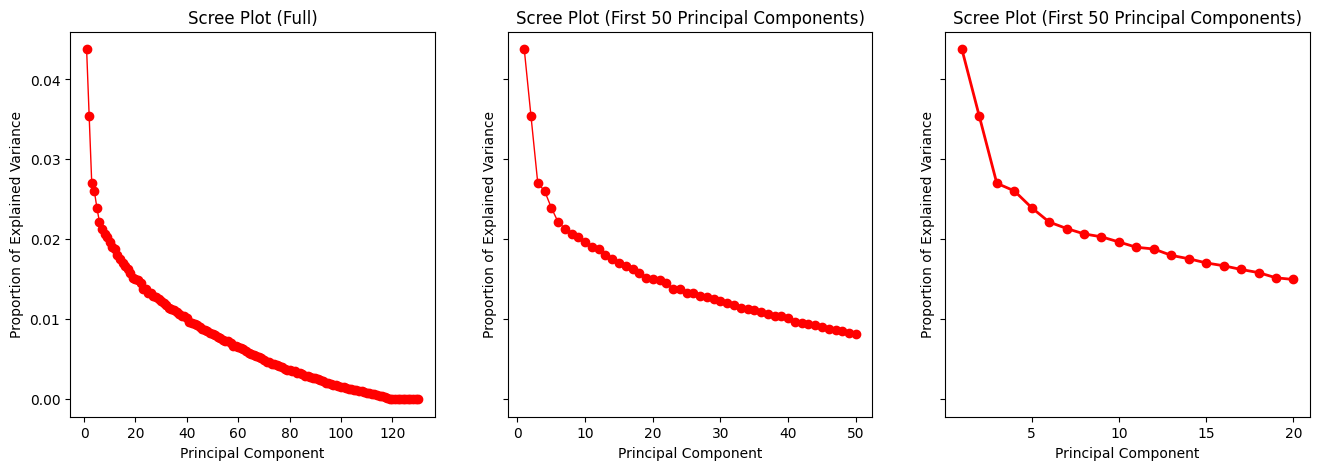

In [141]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [142]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [143]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['Final_Label'])

LogisticRegression()

Let's see how the logistic regression performs on the training dataset from which we develop the model. The mean accuracy is about 62%.

In [144]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['Final_Label'])

0.6153846153846154

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [145]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['Merged_Text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['Final_Label'])

0.42424242424242425

Slightly poorer. How about using more dimensions (40)?

In [146]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['Final_Label'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['Final_Label']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['Final_Label']))

Training:
0.7615384615384615
Testing:
0.48484848484848486


Or still more (100)?

In [147]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['Final_Label'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['Final_Label']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['Final_Label']))

Training:
0.8307692307692308
Testing:
0.5454545454545454


We can know that 62% accuracy seems like the best we can get by using a logistic regression. Now I calculate the statistics

In [150]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

Text vectorliazation again for both train, test and predict data

In [151]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=2, norm='l2')

# Vectorize training data
X_train = vectorizer.fit_transform(train_data_df['Merged_Text'])
y_train = train_data_df['Final_Label']

# Vectorize testing data
X_test = vectorizer.transform(test_data_df['Merged_Text'])
y_test = test_data_df['Final_Label']

# Vectorize uncoded data
X_predic = vectorizer.transform(Predic_President['Merged_Text'])

Train the model

In [152]:
# Initialize and train the logistic regression classifier
clf = LogisticRegression(max_iter=1000)  # Increase iteration count for convergence assurance
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

For multipal labels I will use `OVR` method

              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33         5
         1.0       0.52      0.93      0.67        14
         2.0       0.57      0.29      0.38        14

    accuracy                           0.55        33
   macro avg       0.70      0.47      0.46        33
weighted avg       0.61      0.55      0.49        33



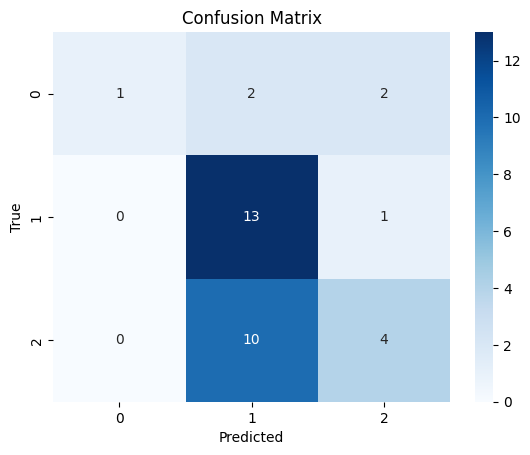

AUC: 0.71


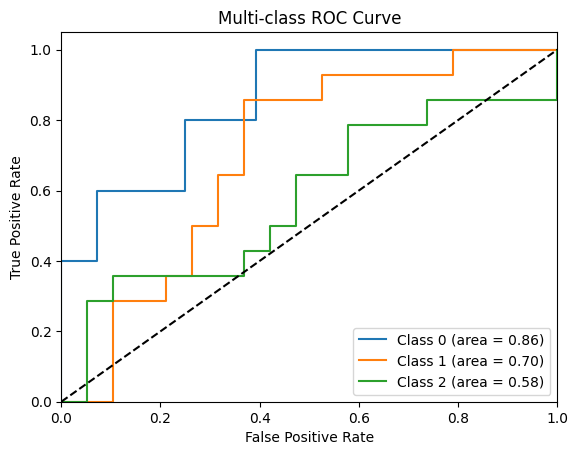

In [153]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Display the classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate AUC for multi-class
y_prob = clf.predict_proba(X_test)
auc_ovr = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print("AUC: {:.2f}".format(auc_ovr))

# Plot ROC curve for multi-class
# Binarize the labels for multi-class scenario
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class
n_classes = y_prob.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

Now I will compare other method performance

# Tree method

In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
President = pd.read_csv('/content/drive/MyDrive/Content_Analysis/mexico_sentences.csv')
President['Final_Label'] = President[['A1', 'A2', 'A3']].mode(axis=1)[0]
Predic_President = President[President['Final_Label'].isnull()]
Labeled_President = President.dropna(subset=['Final_Label'])
Labeled_President.rename(columns={'Labeled_President': 'text', 'Merged_Text': 'text', 'Final_Label': 'category'}, inplace=True)
Labeled_President['tokenized_text'] = Labeled_President['text'].apply(lambda x: lucem_illud.word_tokenize(x))
Labeled_President['normalized_text'] = Labeled_President['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

blobs_df = Labeled_President.rename(columns={'category': 'category'}, inplace=False)[['category', 'tokenized_text', 'normalized_text']]
blobs_df

<ipython-input-259-0611c31ddf7c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labeled_President.rename(columns={'Labeled_President': 'text', 'Merged_Text': 'text', 'Final_Label': 'category'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
<ipython-input-259-0611c31ddf7c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,category,tokenized_text,normalized_text
0,2.0,"[The, fact, that, the, President, George, Bush...","[fact, president, george, bush, foreign, visit..."
1,2.0,"[I, also, acknowledge, President, Bush, 's, de...","[acknowledge, president, bush, demonstration, ..."
2,2.0,"[President, that, you, will, always, be, welco...","[president, welcome, home, language, president..."
3,1.0,"[We, the, Presidents, of, Mexico, and, the, Un...","[president, mexico, united, states, favorable,..."
4,2.0,"[Muchas, gracias, amigo, el, Presidente, de, M...","[muchas, gracias, amigo, el, presidente, de, m..."
...,...,...,...
864,1.0,"[Detention, Conditions, at, the, Mexico, U]","[detention, condition, mexico, u]"
865,1.0,"[Detention, Conditions, at, the, Mexico, U]","[detention, condition, mexico, u]"
866,0.0,"[Rolling, back, the, policies, of, Remain, in,...","[roll, policy, remain, mexico, sit, edge, rio,..."
867,0.0,"[Illegal, Immigration, Unaccompanied, Minors, ...","[illegal, immigration, unaccompanied, minor, m..."


In [261]:
# spill data
df_exampleTree_train, df_exampleTree_test = sklearn.model_selection.train_test_split(blobs_df, test_size=.2)
# vectorlize my data and import Decision Tree classifier from sklearn.tree and fit it using the fit method.
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in blobs_df['normalized_text']])
blobs_df['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]
# Tree method
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(max_depth=4, random_state=0)

Evaluate performance

In [262]:
lucem_illud.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0.0,0.151515,0.482759,0.000000,0.121212,0.000000
1.0,0.545455,0.498120,0.423077,0.423327,0.785714
2.0,0.393939,0.577778,0.666667,0.511111,0.266667


Not as good as logistic method

What happens if we trim the tree?

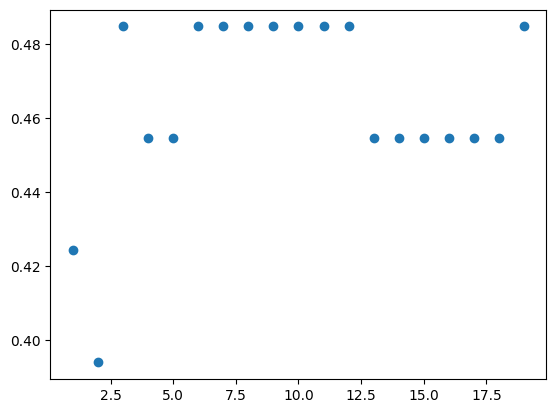

In [263]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

Now I build an ensemble classifier by bagging trees into a random forest

In [264]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [265]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=0.8, n_estimators=100, random_state=1)

Now we calculate performance

In [266]:
lucem_illud.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0.0,0.151515,0.482759,0.000000,0.121212,0.000000
1.0,0.515152,0.524436,0.440000,0.436623,0.785714
2.0,0.363636,0.611111,0.714286,0.541126,0.333333


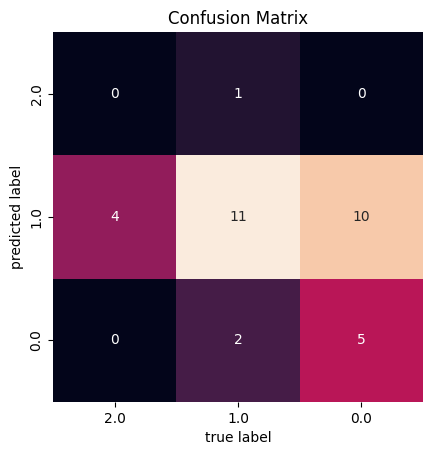

In [267]:
lucem_illud.plotConfusionMatrix(bag, df_exampleTree_test)

Still less effective than logistic method

# K-Nearest Neighbors

load my data

In [269]:
import pandas as pd
President = pd.read_csv('/content/drive/MyDrive/Content_Analysis/mexico_sentences.csv')
President['Final_Label'] = President[['A1', 'A2', 'A3']].mode(axis=1)[0]
Predic_President = President[President['Final_Label'].isnull()]
Labeled_President = President.dropna(subset=['Final_Label'])
Labeled_President.rename(columns={'Labeled_President': 'text', 'Merged_Text': 'text', 'Final_Label': 'category'}, inplace=True)
Labeled_President

<ipython-input-269-98b69d07b33b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labeled_President.rename(columns={'Labeled_President': 'text', 'Merged_Text': 'text', 'Final_Label': 'category'}, inplace=True)


,SPEAKER,DATE,TITLE,CITATION,URL,text,A1,A2,A3,category
0,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,The fact that the President—George Bush's firs...,2.0,2.0,2.0,2.0
1,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,I also acknowledge President Bush's demonstra...,2.0,2.0,2.0,2.0
2,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"President, that you will always be welcome in...",2.0,2.0,2.0,2.0
3,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"We, the Presidents of Mexico and the United St...",2.0,1.0,1.0,1.0
4,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"Muchas gracias, amigo, el Presidente de Mexico",2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
864,Joseph R. Biden,25-Mar-21,The President's News Conference,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,Detention Conditions at the Mexico-U,1.0,1.0,1.0,1.0
865,Joseph R. Biden,25-Mar-21,The President's News Conference,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,Detention Conditions at the Mexico-U,1.0,1.0,1.0,1.0
866,Joseph R. Biden,25-Mar-21,The President's News Conference,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,"Rolling back the policies of ""Remain in Mexic...",0.0,0.0,0.0,0.0
867,Joseph R. Biden,25-Mar-21,The President's News Conference,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,Illegal Immigration/Unaccompanied Minors at th...,0.0,0.0,0.0,0.0


Make a testing and training set:

In [270]:
holdBackFraction = .2
train_ng_df, test_ng_df = sklearn.model_selection.train_test_split(Labeled_President, test_size=holdBackFraction)

initialize our k-nearest neighbors classifier:

In [271]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

try to classify using the TF-IDF vectors:

In [272]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [273]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(n_neighbors=15)

In [274]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0.0,0.184615,0.520000,1.00,0.224615,0.040000
1.0,0.500000,0.535714,0.48,0.480000,1.000000
2.0,0.315385,0.544444,1.00,0.404274,0.088889


In [276]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.5454545454545454


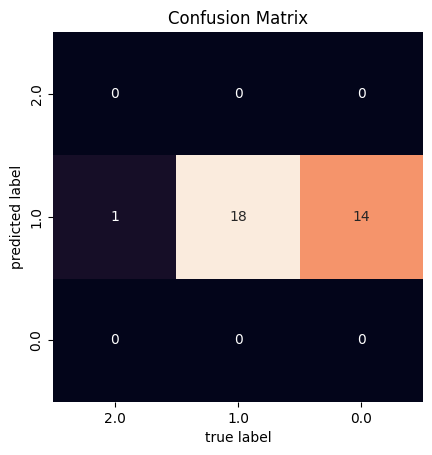

In [277]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_ng_df)

From the results it could be learned that, 0 is more easy to predict and have better results compared to other categories, while 1 is the hardest to predict, because in my data, 1 represents the information that is unrelated to presidents attitude with mexico, which is hard to predict than the positive or negative attitude

# neural network

load my data

In [280]:
import pandas as pd
President = pd.read_csv('/content/drive/MyDrive/Content_Analysis/mexico_sentences.csv')
President['Final_Label'] = President[['A1', 'A2', 'A3']].mode(axis=1)[0]
Predic_President = President[President['Final_Label'].isnull()]
Labeled_President = President.dropna(subset=['Final_Label'])
Labeled_President.rename(columns={'Labeled_President': 'text', 'Merged_Text': 'text', 'Final_Label': 'category'}, inplace=True)
Labeled_President['tokenized_text'] = Labeled_President['text'].apply(lambda x: lucem_illud.word_tokenize(x))
Labeled_President['normalized_text'] = Labeled_President['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

redditDf = Labeled_President.rename(columns={'category': 'category'}, inplace=False)[['category', 'tokenized_text', 'normalized_text']]
redditDf

<ipython-input-280-1b34c4e7c7aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labeled_President.rename(columns={'Labeled_President': 'text', 'Merged_Text': 'text', 'Final_Label': 'category'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
<ipython-input-280-1b34c4e7c7aa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,category,tokenized_text,normalized_text
0,2.0,"[The, fact, that, the, President, George, Bush...","[fact, president, george, bush, foreign, visit..."
1,2.0,"[I, also, acknowledge, President, Bush, 's, de...","[acknowledge, president, bush, demonstration, ..."
2,2.0,"[President, that, you, will, always, be, welco...","[president, welcome, home, language, president..."
3,1.0,"[We, the, Presidents, of, Mexico, and, the, Un...","[president, mexico, united, states, favorable,..."
4,2.0,"[Muchas, gracias, amigo, el, Presidente, de, M...","[muchas, gracias, amigo, el, presidente, de, m..."
...,...,...,...
864,1.0,"[Detention, Conditions, at, the, Mexico, U]","[detention, condition, mexico, u]"
865,1.0,"[Detention, Conditions, at, the, Mexico, U]","[detention, condition, mexico, u]"
866,0.0,"[Rolling, back, the, policies, of, Remain, in,...","[roll, policy, remain, mexico, sit, edge, rio,..."
867,0.0,"[Illegal, Immigration, Unaccompanied, Minors, ...","[illegal, immigration, unaccompanied, minor, m..."


In [281]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

In [282]:
holdBackFraction = .2
train_redditDf, test_redditDf = sklearn.model_selection.train_test_split(redditDf, test_size=holdBackFraction)

In [283]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [284]:
lucem_illud.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0.0,0.181818,0.625000,1.000000,0.431818,0.250000
1.0,0.393939,0.621154,0.500000,0.467366,0.692308
2.0,0.333333,0.648810,0.538462,0.465618,0.583333


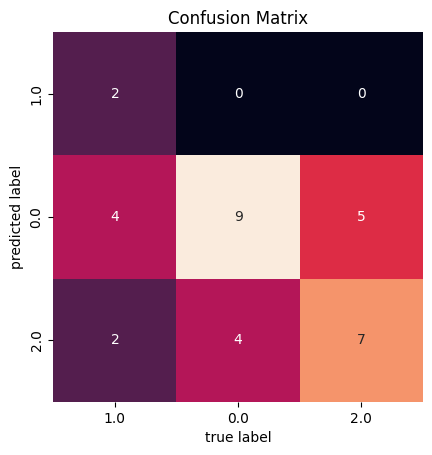

In [285]:
lucem_illud.plotConfusionMatrix(clf_nn, test_redditDf)

# Neural network classification, K-nearest neighbor (KNN), logistic regression, and decision tree approaches are all used for classification tasks:

- # Neural networks: Complex, learn patterns through layers, suitable for large datasets, computationally intensive.
- # KNN: Simple, non-parametric, relies on similarity to neighbors, can be slow for large datasets.
- # Logistic regression: Linear model, interpretable, assumes linear relationships, efficient.
- # Decision trees: Hierarchical, capture complex decision boundaries, prone to overfitting, can be improved with ensemble methods.

# While each approach has strengths and weaknesses, the choice depends on factors like data complexity, interpretability, and computational resources.

# BERTS

load my data

In [288]:
import pandas as pd
President = pd.read_csv('/content/drive/MyDrive/Content_Analysis/mexico_sentences.csv')
President['Final_Label'] = President[['A1', 'A2', 'A3']].mode(axis=1)[0]
President

,SPEAKER,DATE,TITLE,CITATION,URL,Merged_Text,A1,A2,A3,Final_Label
0,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,The fact that the President—George Bush's firs...,2.0,2.0,2.0,2.0
1,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,I also acknowledge President Bush's demonstra...,2.0,2.0,2.0,2.0
2,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"President, that you will always be welcome in...",2.0,2.0,2.0,2.0
3,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"We, the Presidents of Mexico and the United St...",2.0,1.0,1.0,1.0
4,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"Muchas gracias, amigo, el Presidente de Mexico",2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
901,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,That's exactly what we're doing in Mexico,NaN,NaN,NaN,NaN
902,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,This doesn't happen in Mexico anymore,NaN,NaN,NaN,NaN
903,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,Just as I was telling you that in the case of...,NaN,NaN,NaN,NaN
904,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,"In the case of Mexico, this led us to make al...",NaN,NaN,NaN,NaN


In [289]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load the model and word divider
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Create a sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Calculate sentiment
President['sentiment'] = President['Merged_Text'].apply(lambda x: nlp(x)[0]['label'])

# Change label
labels = {'LABEL_0': '0', 'LABEL_1': '1', 'LABEL_2': '2'}
President['sentiment'] = President['sentiment'].map(labels)
President

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

,SPEAKER,DATE,TITLE,CITATION,URL,Merged_Text,A1,A2,A3,Final_Label,sentiment
0,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,The fact that the President—George Bush's firs...,2.0,2.0,2.0,2.0,1
1,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,I also acknowledge President Bush's demonstra...,2.0,2.0,2.0,2.0,2
2,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"President, that you will always be welcome in...",2.0,2.0,2.0,2.0,2
3,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"We, the Presidents of Mexico and the United St...",2.0,1.0,1.0,1.0,2
4,George W. Bush,16-Feb-01,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"Muchas gracias, amigo, el Presidente de Mexico",2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
901,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,That's exactly what we're doing in Mexico,NaN,NaN,NaN,NaN,1
902,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,This doesn't happen in Mexico anymore,NaN,NaN,NaN,NaN,0
903,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,Just as I was telling you that in the case of...,NaN,NaN,NaN,NaN,1
904,Joseph R. Biden,10-Jan-23,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,"In the case of Mexico, this led us to make al...",NaN,NaN,NaN,NaN,1


Above are the precision, recall, the F-measure, and AUC, then perform an ROC visualization, it could learned that this model is somewhat less effective in predic classification, now I will apply it to predic unlabeled data

In [290]:
pip install torch

In [293]:
President = pd.read_csv('/content/drive/MyDrive/Content_Analysis/Homework-Notebooks/week 5/output.csv')

In [295]:
President.dropna(inplace=True)

In [296]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Computational accuracy
accuracy = accuracy_score(President['Final_Label'], President['sentiment'])

# Calculate the accuracy rate, recall rate and F1 score for each category
precision_per_class = precision_score(President['Final_Label'], President['sentiment'], average=None)
recall_per_class = recall_score(President['Final_Label'], President['sentiment'], average=None)
f1_per_class = f1_score(President['Final_Label'], President['sentiment'], average=None)

# Computational confusion matrix
conf_matrix = confusion_matrix(President['Final_Label'], President['sentiment'])

print(f"Accuracy: {accuracy}")
print(f"Precision per class: {precision_per_class}")
print(f"Recall per class: {recall_per_class}")
print(f"F1 Score per class: {f1_per_class}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5950920245398773
Precision per class: [0.47619048 0.57142857 0.68627451]
Recall per class: [0.38461538 0.66666667 0.59322034]
F1 Score per class: [0.42553191 0.61538462 0.63636364]
Confusion Matrix:
[[10 16  0]
 [10 52 16]
 [ 1 23 35]]


In [168]:
# Predict labels for uncoded data
predic_labels = clf.predict(X_predic)

# Optionally, add predictions as a new column
Predic_President['Predicted_Label'] = predic_labels
Predic_President

<ipython-input-168-7e95f0e364f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Predic_President['Predicted_Label'] = predic_labels


,SPEAKER,DATE,TITLE,CITATION,URL,Merged_Text,A1,A2,A3,Final_Label,Predicted_Label
50,George W. Bush,2001,The President's News Conference in Crawford,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,The history of the relationship between Mexico...,NaN,NaN,NaN,NaN,2.0
51,George W. Bush,2001,The President's News Conference in Crawford,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"The long-term solution, however, for immigrati...",NaN,NaN,NaN,NaN,2.0
52,George W. Bush,2001,The President's News Conference in Crawford,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,There are people in Mexico who have got child...,NaN,NaN,NaN,NaN,2.0
53,George W. Bush,2001,The President's News Conference,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"Our staunch friends, Great Britain, our neigh...",NaN,NaN,NaN,NaN,1.0
54,George W. Bush,2002,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,I have accepted with pleasure and appreciatio...,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
901,Joseph R. Biden,2023,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,That's exactly what we're doing in Mexico,NaN,NaN,NaN,NaN,1.0
902,Joseph R. Biden,2023,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,This doesn't happen in Mexico anymore,NaN,NaN,NaN,NaN,1.0
903,Joseph R. Biden,2023,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,Just as I was telling you that in the case of...,NaN,NaN,NaN,NaN,1.0
904,Joseph R. Biden,2023,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,"In the case of Mexico, this led us to make al...",NaN,NaN,NaN,NaN,1.0


In [169]:
Predic_President.to_csv('/content/drive/MyDrive/Content_Analysis/Predic_President.csv', index=False)

I will merge the manual labeled and machine predicted label and transfer the data type

In [170]:
import pandas as pd
from datetime import datetime
# Change date format
Labeled_President['DATE'] = pd.to_datetime(Labeled_President['DATE'], format='%d-%b-%y')
Labeled_President['DATE'] = Labeled_President['DATE'].dt.strftime('%Y')

<ipython-input-170-05e9660a8a09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labeled_President['DATE'] = pd.to_datetime(Labeled_President['DATE'], format='%d-%b-%y')
<ipython-input-170-05e9660a8a09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labeled_President['DATE'] = Labeled_President['DATE'].dt.strftime('%Y')


In [174]:
combined_df = pd.concat([Labeled_President, Predic_President], ignore_index=True)
# Create a new column "Label" and transfer values from "Final_Label" and "Predicted_Label" to this new column
combined_df['Label'] = combined_df.apply(lambda row: row['Final_Label'] if not pd.isnull(row['Final_Label']) else row['Predicted_Label'], axis=1)
# Drop the "Final_Label" and "Predicted_Label" columns
combined_df.drop(columns=['Final_Label', 'Predicted_Label'], inplace=True)
combined_df

,SPEAKER,DATE,TITLE,CITATION,URL,Merged_Text,A1,A2,A3,Label
0,George W. Bush,2001,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,The fact that the President—George Bush's firs...,2.0,2.0,2.0,2.0
1,George W. Bush,2001,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,I also acknowledge President Bush's demonstra...,2.0,2.0,2.0,2.0
2,George W. Bush,2001,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"President, that you will always be welcome in...",2.0,2.0,2.0,2.0
3,George W. Bush,2001,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"We, the Presidents of Mexico and the United St...",2.0,1.0,1.0,1.0
4,George W. Bush,2001,The President's News Conference With President...,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"Muchas gracias, amigo, el Presidente de Mexico",2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
901,Joseph R. Biden,2023,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,That's exactly what we're doing in Mexico,NaN,NaN,NaN,1.0
902,Joseph R. Biden,2023,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,This doesn't happen in Mexico anymore,NaN,NaN,NaN,1.0
903,Joseph R. Biden,2023,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,Just as I was telling you that in the case of...,NaN,NaN,NaN,1.0
904,Joseph R. Biden,2023,The President's News Conference With Prime Min...,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,"In the case of Mexico, this led us to make al...",NaN,NaN,NaN,1.0


In [178]:
# Count the number of occurrences of each Label per year
result = combined_df.groupby(['DATE', 'Label']).size().reset_index(name='Counts')
# Use pivot_table()
result_pivot = result.pivot_table(index='DATE', columns='Label', values='Counts', fill_value=0)
result_pivot.reset_index(inplace=True)
result_pivot.to_csv('/content/drive/MyDrive/Content_Analysis/result_pivot.csv', index=False)
result_pivot

Label,DATE,0.0,1.0,2.0
0,2001,2,23,29
1,2002,0,20,14
2,2003,0,3,0
3,2004,1,19,10
4,2005,0,16,2
5,2006,1,8,3
6,2007,0,51,20
7,2008,0,28,15
8,2009,0,70,38
9,2010,0,27,6


In [251]:
result = pd.read_csv('/content/drive/MyDrive/Content_Analysis/result.csv')
result

,DATE,negative_count,netural_count,positive_count,GDP,Aid
0,2001,2,23,29,1.058193,1.881092
1,2002,0,20,14,1.092911,2.420823
2,2003,0,3,0,1.145644,2.743628
3,2004,1,19,10,1.221719,3.712610
4,2005,0,16,2,1.303920,3.485929
5,2006,1,8,3,1.381559,3.829304
6,2007,0,51,20,1.447423,2.618398
7,2008,0,28,15,1.476986,3.575401
8,2009,0,70,38,1.447806,3.754824
9,2010,0,27,6,1.504896,5.018008


In [236]:
import statsmodels.api as sm

# Set variables
X = result[['negative_count', 'positive_count', 'netural_count', 'GDP']]
y = result['Aid']

# Run OLS model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Aid   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              133.3
Date:                Tue, 05 Mar 2024   Prob (F-statistic):                    1.28e-13
Time:                        06:17:02   Log-Likelihood:                         -30.061
No. Observations:                  23   AIC:                                      68.12
Df Residuals:                      19   BIC:                                      72.66
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

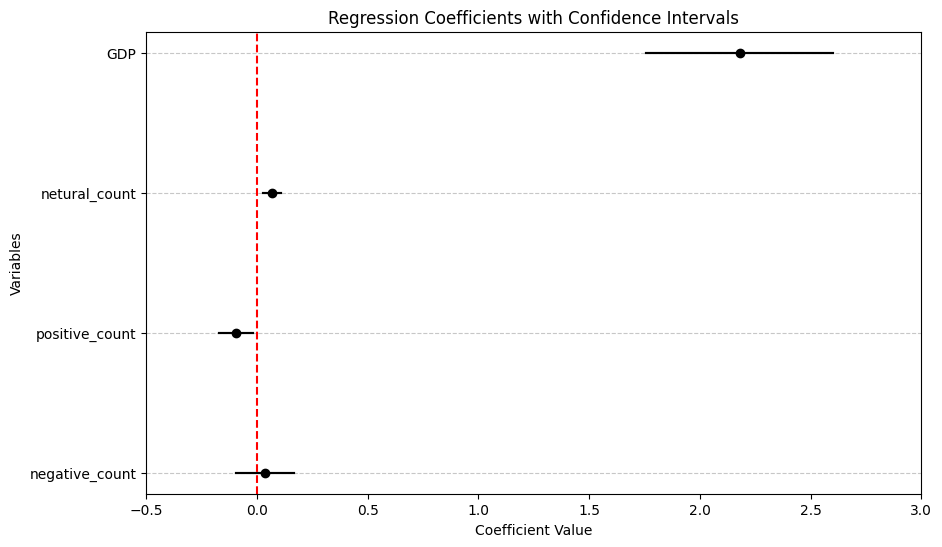

In [238]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Set variables
X = result[['negative_count', 'positive_count', 'netural_count', 'GDP']]  # 不包含常数项
y = result['Aid']

# Run OLS model without constant
model = sm.OLS(y, X)
results = model.fit()

# Get coefficients and confidence intervals
coef = results.params.values
ci = results.conf_int()

# Define y-axis labels
y_labels = ['negative_count', 'positive_count', 'netural_count', 'GDP']

# Plot the coefficients
plt.figure(figsize=(10, 6))
for i in range(len(coef)):
    # Plot coefficients as circles
    plt.scatter(coef[i], i, color='black', zorder=3)

    # Plot confidence intervals as horizontal lines
    plt.plot([ci.iloc[i, 0], ci.iloc[i, 1]], [i, i], color='black', zorder=2)

    # Plot line segment from left endpoint of confidence interval to right endpoint
    plt.plot([ci.iloc[i, 0], ci.iloc[i, 1]], [i, i], color='black', zorder=1)

# Plot red dashed line at x=0
plt.axvline(x=0, color='red', linestyle='--')

# Set x-axis limits to include both positive and negative values
plt.xlim(-0.5, 3.0)

# Set y-axis ticks and labels
plt.yticks(range(len(y_labels)), y_labels)

# Add labels and title
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.title('Regression Coefficients with Confidence Intervals')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
